# import

In [1]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config 
from astropy import units as u
from astropy.coordinates import SkyCoord

from astroquery.irsa import Irsa  

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_59597/915632295.py:12: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [2]:
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [5]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #Times New Roman
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_59597/1225799043.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [6]:
#from adjustText import adjust_text

def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [7]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

## time_convert

In [8]:
from astropy.time import Time
from astropy.io import fits
import time
import datetime
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [9]:
convert_date_single(57800)

datetime.datetime(2017, 2, 16, 0, 0)

In [10]:
convert_date_single(57580)

datetime.datetime(2016, 7, 11, 0, 0)

## def plot_secax

In [11]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

In [12]:
def get_new_range_datas(mjd1, flux1, err1,time_min,time_max):
    mjd_s=[]
    flux_s=[]
    err_s=[]
    for i,j,k in zip(mjd1, flux1, err1):
        if i>=time_min and i<time_max:
            mjd_s.append(i)
            flux_s.append(j)
            err_s.append(k)
    return np.array(mjd_s),np.array(flux_s),np.array(err_s)

## cosmo

In [14]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

## get_mag_weighted_mean_mag

In [15]:
import numpy as np
def get_mag_weighted_mean_mag(mags,e_mags):
    N=len(mags)
    mag_weighted_mean_mag =0  
    
    w_n=np.sum(1.0/e_mags**2)   
    
    for mag,e_mag in zip(mags,e_mags):
        w_i=1.0/e_mag**2
        w=w_i/w_n
        mag_weighted_mean_mag=mag_weighted_mean_mag+w*mag
                          
    return mag_weighted_mean_mag 


def get_mag_weighted_mean_e_mag(mags,e_mags):
    N=len(mags)  

    w_n=np.sum(1.0/e_mags**2)
    
    mag_weighted_mean_mag = get_mag_weighted_mean_mag(mags,e_mags)
    
    mag_weighted_mean_e_mag =0 
    
    for mag,e_mag in zip(mags,e_mags):        
        w_i=1.0/e_mag**2
        w=w_i/w_n
        
        mag_weighted_mean_e_mag=mag_weighted_mean_e_mag+w*(mag-mag_weighted_mean_mag)**2
        
    mag_weighted_mean_e_mag_=(mag_weighted_mean_e_mag/(N-1))**0.5                                 
    return mag_weighted_mean_e_mag_

## def_median_lc

In [16]:
def median_lc(data,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=100):
    #data=data.sort_values(timelabel)
    data=drop_index(data)
    mean_mjds=[]
    mean_mags=[]
    mean_mags_e=[]
    
    if len(data)>2:
        mjd_t0=data[timelabel][0]-10
        mjd_tend=data[timelabel][len(data)-1]+10

        N=int((mjd_tend-mjd_t0)//interval+1)
        #print(N)

        time_interval=np.linspace(mjd_t0,interval*N+mjd_t0,N+1)
        #print(time_interval)

        for index,i in enumerate(time_interval):
            if index < N:
                data_select=data[data[timelabel]>=time_interval[index]]
                data_select=data_select[data_select[timelabel]<time_interval[index+1]]
                data_select=drop_index(data_select)

                if len(data_select)>2:
                    #mean_mjd=np.mean(data_select[timelabel])
                    mags=data_select[maglabel]
                    e_mags=data_select[e_maglabel]               
                    mean_mag=get_mag_weighted_mean_mag(mags,e_mags)
                    mag_weighted_mean_e_mag=get_mag_weighted_mean_e_mag(mags,e_mags)
                    #mean_mag_e=np.mean(data_select[e_maglabel])

                    data_select=data_select[abs(data_select[maglabel]-mean_mag)<sigma_outlier*mag_weighted_mean_e_mag]
                    data_select=drop_index(data_select)


                    #print(len(data_select))

                    mags=data_select[maglabel]
                    e_mags=data_select[e_maglabel]  
                    if len(data_select)>2:
                        mean_mag=get_mag_weighted_mean_mag(mags,e_mags)               
                        mean_mag_e=get_mag_weighted_mean_e_mag(mags,e_mags)

                        mean_mjd=np.mean(data_select[timelabel])               
                        mean_mjds.append(mean_mjd)
                        mean_mags.append(mean_mag)
                        mean_mags_e.append(mean_mag_e)
                        
        mean_mjds,mean_mags,mean_mags_e=(np.array(mean_mjds),np.array(mean_mags),np.array(mean_mags_e))
        
    return mean_mjds,mean_mags,mean_mags_e


## get_outlier_remove

In [17]:
def get_outlier_remove_data(data,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10):
    data_remove=pd.DataFrame([])
    #data_outlier=pd.DataFrame([])
    
    #data=data.sort_values(timelabel)
    data=drop_index(data)
    mean_mjds=[]
    mean_mags=[]
    mean_mags_e=[]
    
    if len(data)>2:
        mjd_t0=data[timelabel][0]-20
        mjd_tend=data[timelabel][len(data)-1]+20

        N=int((mjd_tend-mjd_t0)//interval+1)
        #print(N)

        time_interval=np.linspace(mjd_t0,interval*N+mjd_t0,N+1)
        #print(time_interval)

        for index,i in enumerate(time_interval):
            if index < N:
                data_select=data[data[timelabel]>=time_interval[index]]
                data_select=data_select[data_select[timelabel]<time_interval[index+1]]
                data_select=drop_index(data_select)
                
                if len(data_select)>2:
                    #mean_mjd=np.mean(data_select[timelabel])
                    mags=data_select[maglabel]
                    e_mags=data_select[e_maglabel]               
                    mean_mag=get_mag_weighted_mean_mag(mags,e_mags)
                    mag_weighted_mean_e_mag=get_mag_weighted_mean_e_mag(mags,e_mags)
                    #mean_mag_e=np.mean(data_select[e_maglabel])

                    data_remove_outlier=data_select[abs(data_select[maglabel]-mean_mag)<=sigma_outlier*mag_weighted_mean_e_mag]
                    
                    data_remove_outlier=drop_index(data_remove_outlier) 
                    data_remove=data_remove.append(data_remove_outlier,ignore_index=True)                   
         
        
                    '''                 
                    data_out=data_select[abs(data_select[maglabel]-mean_mag)>sigma_outlier*mag_weighted_mean_e_mag]
                    data_out=drop_index(data_out)
                    data_outlier.append(data_out,ignore_index=True)
              
                    '''
    #data_remove=data_remove.sort_values(timelabel)
    data_remove=drop_index(data_remove)    
    return data_remove#,data_outlier                   
                    
    

## def get_outlier_data

In [18]:
def get_outlier_data(data,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10):
    data_remove=pd.DataFrame([])
    data_outlier=pd.DataFrame([])
    
    #data=data.sort_values(timelabel)
    data=drop_index(data)
    mean_mjds=[]
    mean_mags=[]
    mean_mags_e=[]
    
    if len(data)>2:
        mjd_t0=data[timelabel][0]-20
        mjd_tend=data[timelabel][len(data)-1]+20

        N=int((mjd_tend-mjd_t0)//interval+1)
        #print(N)

        time_interval=np.linspace(mjd_t0,interval*N+mjd_t0,N+1)
        #print(time_interval)

        for index,i in enumerate(time_interval):
            if index < N:
                data_select=data[data[timelabel]>=time_interval[index]]
                data_select=data_select[data_select[timelabel]<time_interval[index+1]]
                data_select=drop_index(data_select)
                
                if len(data_select)>2:
                    #mean_mjd=np.mean(data_select[timelabel])
                    mags=data_select[maglabel]
                    e_mags=data_select[e_maglabel]               
                    mean_mag=get_mag_weighted_mean_mag(mags,e_mags)
                    mag_weighted_mean_e_mag=get_mag_weighted_mean_e_mag(mags,e_mags)
                    #mean_mag_e=np.mean(data_select[e_maglabel])

                    '''data_remove_outlier=data_select[abs(data_select[maglabel]-mean_mag)<=sigma_outlier*mag_weighted_mean_e_mag]                   
                    data_remove_outlier=drop_index(data_remove_outlier) 
                    data_remove=data_remove.append(data_remove_outlier,ignore_index=True)  '''                 
         
        
                                    
                    data_out=data_select[abs(data_select[maglabel]-mean_mag)>sigma_outlier*mag_weighted_mean_e_mag]
                    data_out=drop_index(data_out)
                    data_outlier=data_outlier.append(data_out,ignore_index=True)
                                  
    #data_outlier=data_outlier.sort_values(timelabel)
    #data_outlier=drop_index(data_outlier)   
    return data_outlier#,data_outlier                   
                    
    

data_test_neo,data_test_mep

## def get_remove_neo_mep(data_test_neo,data_test_mep):


data_test_neo.columns,len(data_test_neo)

timelabel,maglabel,e_maglabel=('mjd','w1mpro','w1sigmpro')
data_test_neo_remove=get_outlier_remove_data(data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=5)
timelabel,maglabel,e_maglabel=('mjd','w2mpro','w2sigmpro')
data_test_neo_remove=get_outlier_remove_data(data_test_neo_remove,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=5)


In [221]:
def get_remove_neo_mep(data_test_neo,data_test_mep):
    #neo
    if len(data_test_neo)>0:
        timelabel,maglabel,e_maglabel=('mjd','w1mpro','w1sigmpro')
        data_test_neo_remove=get_outlier_remove_data(data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
        timelabel,maglabel,e_maglabel=('mjd','w2mpro','w2sigmpro')
        data_test_neo_remove=get_outlier_remove_data(data_test_neo_remove,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
    else:
        data_test_neo_remove=[]
        
    #mep
    if len(data_test_mep)>0:
        timelabel,maglabel,e_maglabel=('mjd','w1mpro_ep','w1sigmpro_ep')
        data_test_mep_remove=get_outlier_remove_data(data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
        timelabel,maglabel,e_maglabel=('mjd','w2mpro_ep','w2sigmpro_ep')
        data_test_mep_remove=get_outlier_remove_data(data_test_mep_remove,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
    else:
        data_test_mep_remove=[]
    return data_test_neo_remove,data_test_mep_remove

In [222]:
def get_outlier_neo_mep(data_test_neo,data_test_mep):
    #neo
    if len(data_test_neo)>0:    
        timelabel,maglabel,e_maglabel=('mjd','w1mpro','w1sigmpro')
        data_test_neo_outiler=get_outlier_data(data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
        timelabel,maglabel,e_maglabel=('mjd','w2mpro','w2sigmpro')
        data_test_neo_outiler=get_outlier_data(data_test_neo_outiler,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
    else:
        data_test_neo_outiler=[]
    #mep
    if len(data_test_mep)>0:    
        timelabel,maglabel,e_maglabel=('mjd','w1mpro_ep','w1sigmpro_ep')
        data_test_mep_outiler=get_outlier_data(data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
        timelabel,maglabel,e_maglabel=('mjd','w2mpro_ep','w2sigmpro_ep')
        data_test_mep_outiler=get_outlier_data(data_test_mep_outiler,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10)
    else:
        data_test_mep_outiler=[]
    return data_test_neo_outiler,data_test_mep_outiler

## plot_outlier_median_lc

In [21]:
def plot_outlier_median_lc(ax,data,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=10):
    #data=data.sort_values(timelabel)
    data=drop_index(data)
    mean_mjds=[]
    mean_mags=[]
    mean_mags_e=[]
    if len(data)>2:
        mjd_t0=data[timelabel][0]-20
        mjd_tend=data[timelabel][len(data)-1]+20

        N=int((mjd_tend-mjd_t0)//interval+1)
        #print(N)

        time_interval=np.linspace(mjd_t0,interval*N+mjd_t0,N+1)
        #print(time_interval)

        for index,i in enumerate(time_interval):
            if index < N:
                data_select=data[data[timelabel]>=time_interval[index]]
                data_select=data_select[data_select[timelabel]<time_interval[index+1]]
                data_select=drop_index(data_select)

                if len(data_select)>2:
                    #mean_mjd=np.mean(data_select[timelabel])
                    mags=data_select[maglabel]
                    e_mags=data_select[e_maglabel]               
                    mean_mag=get_mag_weighted_mean_mag(mags,e_mags)
                    mag_weighted_mean_e_mag=get_mag_weighted_mean_e_mag(mags,e_mags)
                    #mean_mag_e=np.mean(data_select[e_maglabel])

                    data_select_outlier=data_select[abs(data_select[maglabel]-mean_mag)>=sigma_outlier*mag_weighted_mean_e_mag]
                    data_select_outlier=drop_index(data_select_outlier)  
                    if len(data_select_outlier)>0:
                        ax.scatter(data_select_outlier[timelabel],data_select_outlier[maglabel],
                               color='red',zorder=3,s=6)


## def plot_outliers

def plot_outliers_w1(ax,data_test_neo,data_test_mep,sigma_outlier=5):
    timelabel,maglabel,e_maglabel=('mjd','w1mpro','w1sigmpro')
    plot_outlier_median_lc(ax,data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

    timelabel,maglabel,e_maglabel=('mjd','w1mpro_ep','w1sigmpro_ep')
    plot_outlier_median_lc(ax,data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

    #return data_test_neo_w1_outlier,data_test_neo_w2_outlier,data_test_mep_w1_outlier,data_test_mep_w2_outlier

def plot_outliers_w2(ax,data_test_neo,data_test_mep,sigma_outlier=5):
    timelabel,maglabel,e_maglabel=('mjd','w2mpro','w2sigmpro')
    plot_outlier_median_lc(ax,data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

    timelabel,maglabel,e_maglabel=('mjd','w2mpro_ep','w2sigmpro_ep')
    plot_outlier_median_lc(ax,data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

In [ ]:
print()

## def get_wise_data

a = None
if a:
    print(1)
else:
    print(2)

In [245]:
def get_wise_data(name_test,datawise_dir=CLAGN_wisedata_dir):
    #print(name_test)
    search_name=name_test.replace(' ','') 
    save_name=search_name.strip()
    if os.path.exists(os.path.join(datawise_dir,'wise_%s_neo.csv'%save_name)):
        data_test_neo=pd.read_csv(os.path.join(datawise_dir,'wise_%s_neo.csv'%save_name))
        data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
        data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
        data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
        data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
        #data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
        #data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]  
        #data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
        #data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]
        #data_test_neo=data_test_neo[data_test_neo['cc_flags']=="b'0000'"]
        #data_test_neo=data_test_neo[data_test_neo['nb']<3]
        #data_test_neo=data_test_neo[data_test_neo['na']==0] 
        #data_test_neo=data_test_neo[data_test_neo['w1snr']>10] 
        #data_test_neo=data_test_neo[data_test_neo['w2snr']>10] 

        data_test_neo=data_test_neo[data_test_neo['qual_frame']>0]
        #print(len(data_test_neo))
        data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                                     'w1sigmpro','w2sigmpro',
                                     ]].sort_values('mjd'))

        data_test_neo=data_test_neo.reset_index(drop=True)
    #print(data_test_neo.columns)
     
    else:
        data_test_neo=[]
    if os.path.exists(os.path.join(datawise_dir,'wise_%s_mep.csv'%save_name)):
        
        data_test_mep=pd.read_csv(os.path.join(datawise_dir,'wise_%s_mep.csv'%save_name))
        data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
        data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
        data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
        data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
        #data_test_mep=data_test_mep[data_test_mep['qual_frame']>0]
        data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
        data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
        #data_test_mep=data_test_mep[data_test_mep['cc_flags']=="b'0000'"]
        #data_test_mep=data_test_mep[data_test_mep['nb']<3]
        #data_test_mep=data_test_mep[data_test_mep['na']==0] 

        #print(len(data_test_mep))
        data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                             'w1sigmpro_ep','w2sigmpro_ep',
                                             ]].sort_values('mjd'))

        data_test_mep=data_test_mep.reset_index(drop=True)
    #print(data_test_mep.columns)
    #if not os.path.exists(save_lc_img_path):
    else:
        data_test_mep=[]
    return data_test_neo,data_test_mep
    

In [27]:
def get_M1minM2_data(data_test_neo,data_test_mep,neo_maglabel_1='w1mpro',neo_maglabel_2='w2mpro',\
                     mep_maglabel_1='w1mpro_ep',mep_maglabel_2='w2mpro_ep'):
    
    data_test_neo['delta_M']=data_test_neo[neo_maglabel_1]-data_test_neo[neo_maglabel_2]
    data_test_mep['delta_M']=data_test_mep[neo_maglabel_1]-data_test_mep[neo_maglabel_2]
    
    
    return data_test_neo['mjd','delta_M'],data_test_mep['mjd','delta_M']
    

## def get_wise_<font color=red>RADEC</font>_data 

In [28]:
def get_wise_radec_data(radeg,decdeg,datawise_dir=CLAGN_wisedata_dir):
    #print(name_test)
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #name=save_name

    data_test_neo=pd.read_csv(os.path.join(datawise_dir,'wise_%s_neo.csv'%save_name))
    data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
    #data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
    #data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]  
    #data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
    #data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]
    #data_test_neo=data_test_neo[data_test_neo['cc_flags']=="b'0000'"]
    #data_test_neo=data_test_neo[data_test_neo['cc_flags']=='0000']
    #data_test_neo=data_test_neo[data_test_neo['nb']<3]
    #data_test_neo=data_test_neo[data_test_neo['na']==0] 
    data_test_neo=data_test_neo[data_test_neo['w1snr']>3] 
    data_test_neo=data_test_neo[data_test_neo['w2snr']>3]     
    #data_test_neo=data_test_neo[data_test_neo['qual_frame']>0]
    
    #print(len(data_test_neo))
    data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                                 'w1sigmpro','w2sigmpro',
                                 ]].sort_values('mjd'))

    data_test_neo=data_test_neo.reset_index(drop=True)
    #print(data_test_neo.columns)

    data_test_mep=pd.read_csv(os.path.join(datawise_dir,'wise_%s_mep.csv'%save_name))
    data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
    #data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
    data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
    data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    #data_test_mep=data_test_mep[data_test_mep['cc_flags']=="b'0000'"]
    data_test_mep=data_test_mep[data_test_mep['cc_flags']==0]
    #data_test_mep=data_test_mep[data_test_mep['nb']<3]
    #data_test_mep=data_test_mep[data_test_mep['na']==0] 

    #print(len(data_test_mep))
    data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                         'w1sigmpro_ep','w2sigmpro_ep',
                                         ]].sort_values('mjd'))

    data_test_mep=data_test_mep.reset_index(drop=True)
    #print(data_test_mep.columns)
    #if not os.path.exists(save_lc_img_path):
      
    return data_test_neo,data_test_mep
    

## def get_intrinsic_var

In [29]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028

def get_intrinsic_var(data,mag_label,magerr_label,epsilon_s):
    
    mags=data[mag_label]
    e_mags=data[magerr_label]
    
    mag_weighted_mean_mag = get_mag_weighted_mean_mag(mags,e_mags)    
    mag_weighted_mean_e_mag_= get_mag_weighted_mean_e_mag(mags,e_mags)
    mag_mean=mag_weighted_mean_mag
    
    length_N=len(data[mag_label])
    epsilon_square=np.average(data[magerr_label]**2)+epsilon_s**2
    Sigma_square=np.sum((data[mag_label]-mag_mean)**2)/(length_N-1)
    
    if Sigma_square>epsilon_square:
        sigma_m=np.sqrt(Sigma_square-epsilon_square)
    else:
        sigma_m=0
    
    if length_N<2:
        sigma_m=-1#print(length_N)
    return sigma_m

## def get_intrinsic_var_rebin

In [30]:
def get_intrinsic_var_rebin(data_rebin_neo,data_rebin_mep,epsilon_s):
    
    mags=data[mag_label]
    e_mags=data[magerr_label]
    
    mag_weighted_mean_mag = get_mag_weighted_mean_mag(mags,e_mags)    
    mag_weighted_mean_e_mag_= get_mag_weighted_mean_e_mag(mags,e_mags)
    mag_mean=mag_weighted_mean_mag
    
    length_N=len(mags)
    epsilon_square=np.average(data[magerr_label]**2)+epsilon_s**2
    Sigma_square=np.sum((data[mag_label]-mag_mean)**2)/(length_N-1)
    
    if Sigma_square>epsilon_square:
        sigma_m=np.sqrt(Sigma_square-epsilon_square)
    else:
        sigma_m=0
    
    if length_N<2:
        sigma_m=-1#print(length_N)
        
    return sigma_m

## def get_minmax_mag_name_one

## def get_<font color=red>$\Delta M$_radec</font>

In [ ]:
def get_minmax_mag_name_one(data_test_neo,data_test_mep):    
    maxmag=0
    minmag=20
    maxmag_var=0 
    
    if len(data_test_neo)>20:    
        mean_mjds_neo,mean_mags_neo,mean_mags_e_neo=median_lc(data_test_neo,'mjd','w1mpro','w1sigmpro',interval=180,)
        maxmag=max(max(mean_mags_neo),maxmag)  
        minmag=min(min(mean_mags_neo),minmag)  
    
    if len(data_test_mep)>20: 
        mean_mjds_mep,mean_mags_mep,mean_mags_e_mep=median_lc(data_test_mep,'mjd','w1mpro_ep','w1sigmpro_ep',interval=180,)
        maxmag=max(max(mean_mags_mep),maxmag)  
        minmag=min(min(mean_mags_mep),minmag) 
        
    maxmag_var=maxmag-minmag
    return maxmag_var   

## def Wmag_to_Lum

In [106]:
def W1mag_to_Lum(w1,d_cm):
    Lum=(-48.6-w1-2.699)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
    return Lum #logLum

def W2mag_to_Lum(w2,d_cm):
    Lum=(-48.6-w2-3.339)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)
    return Lum #logLum
 

def W3mag_to_Lum(w3,d_cm):
    Lum=(-48.6-w3-5.174)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(12*u.um)).to(u.Hz).value)
    return Lum #logLum

def W4mag_to_Lum(w4,d_cm):
    Lum=(-48.6-w4-6.620)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(22*u.um)).to(u.Hz).value)
    return Lum #logLum

## get_rebinwise_data

In [ ]:
def get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100):
    #print(name_test)
    #search_name=name_test.replace(' ','') 
    #save_name=search_name.strip()
    
    
    data_rebin_neo=pd.DataFrame([])
    data_rebin_mep=pd.DataFrame([])
    
    timelabel,maglabel,e_maglabel=('mjd','w1mpro','w1sigmpro')
    band='W1'
    mean_mjds,mean_mags,mean_mags_e=median_lc(data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

    data_rebin_neo['t_W1']=mean_mjds
    data_rebin_neo['W1']=mean_mags
    data_rebin_neo['e_W1']=mean_mags_e
    
    timelabel,maglabel,e_maglabel=('mjd','w2mpro','w2sigmpro')
    band='W2' 
    mean_mjds,mean_mags,mean_mags_e=median_lc(data_test_neo,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)
    
    data_rebin_neo['t_W2']=mean_mjds
    data_rebin_neo['W2']=mean_mags
    data_rebin_neo['e_W2']=mean_mags_e
    
#############################################################
    timelabel,maglabel,e_maglabel=('mjd','w1mpro_ep','w1sigmpro_ep')
    band='W1'
    mean_mjds,mean_mags,mean_mags_e=median_lc(data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)

    data_rebin_mep['t_W1']=mean_mjds
    data_rebin_mep['W1']=mean_mags
    data_rebin_mep['e_W1']=mean_mags_e
    
    timelabel,maglabel,e_maglabel=('mjd','w2mpro_ep','w2sigmpro_ep')
    band='W2' 
    mean_mjds,mean_mags,mean_mags_e=median_lc(data_test_mep,timelabel,maglabel,e_maglabel,interval=180,sigma_outlier=sigma_outlier)
    
    data_rebin_mep['t_W2']=mean_mjds
    data_rebin_mep['W2']=mean_mags
    data_rebin_mep['e_W2']=mean_mags_e
        
        
    return data_rebin_neo,data_rebin_mep
    

In [ ]:
save_lc_img_dir

## def plot_mag 

In [232]:
def plot_mag_w1(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w1mpro'],data_test_neo['w1sigmpro'],
                    fillstyle="none",
                    ls='',marker='o',color='red',label='W1',zorder=0)
    if len(data_test_mep)>0:    
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],data_test_mep['w1sigmpro_ep'],
                    fillstyle="none",
                    ls='',marker='o',color='red',label='W1',zorder=0)
    #ax.scatter(data_test_neo_w1_outlier['mjd'],data_test_neo_w1_outlier['w1mpro'],marker='.',color='red',zorder=1)
    #ax.scatter(data_test_mep_w1_outlier['mjd'],data_test_mep_w1_outlier['w1mpro_ep'],marker='.',color='red',zorder=1)

def plot_mag_w2(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w2mpro'],data_test_neo['w2sigmpro'],
                    fillstyle="none",
                    ls='',marker='o',color='blue',label='W2',zorder=0)
    if len(data_test_mep)>0:
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],data_test_mep['w2sigmpro_ep'],
                    fillstyle="none",
                    ls='',marker='o',color='blue',label='W2',zorder=0)
    #ax.scatter(data_test_neo_w2_outlier['mjd'],data_test_neo_w2_outlier['w2mpro'],marker='.',color='red',zorder=1)
    #ax.scatter(data_test_mep_w2_outlier['mjd'],data_test_mep_w2_outlier['w2mpro_ep'],marker='.',color='red',zorder=1)
    
def plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep):
    if len(data_rebin_neo)>0:
        ax.errorbar(data_rebin_neo['t_W1'],data_rebin_neo['W1'],data_rebin_neo['e_W1'],
                    ls='',marker='^',color='red',label='W1',zorder=2)
    if len(data_rebin_mep)>0:
        ax.errorbar(data_rebin_mep['t_W1'],data_rebin_mep['W1'],data_rebin_mep['e_W1'],
                    ls='',marker='^',color='red',label='W1',zorder=2)

def plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep):  
    if len(data_rebin_neo)>0:
        ax.errorbar(data_rebin_neo['t_W2'],data_rebin_neo['W2'],data_rebin_neo['e_W2'],
                    ls='',marker='+',color='blue',label='W2',zorder=2)
    if len(data_rebin_mep)>0:
        ax.errorbar(data_rebin_mep['t_W2'],data_rebin_mep['W2'],data_rebin_mep['e_W2'],
                    ls='',marker='+',color='blue',label='W2',zorder=2)


## def plot_mag_w1_filled

In [197]:
def plot_mag_w1_filled(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w1mpro'],data_test_neo['w1sigmpro'],
                    markersize=3,
                    ls='',marker='.',color='red',label='W1',zorder=0)
        
    if len(data_test_mep)>0:    
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],data_test_mep['w1sigmpro_ep'],
                    markersize=3,
                    ls='',marker='.',color='red',label='W1',zorder=0)
        
    #ax.scatter(data_test_neo_w1_outlier['mjd'],data_test_neo_w1_outlier['w1mpro'],marker='.',color='red',zorder=1)
    #ax.scatter(data_test_mep_w1_outlier['mjd'],data_test_mep_w1_outlier['w1mpro_ep'],marker='.',color='red',zorder=1)

def plot_mag_w2_filled(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w2mpro'],data_test_neo['w2sigmpro'],
                    markersize=3,
                    ls='',marker='.',color='blue',label='W2',zorder=0)
        
    if len(data_test_mep)>0:
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],data_test_mep['w2sigmpro_ep'],
                    markersize=3,
                    ls='',marker='.',color='blue',label='W2',zorder=0)

In [198]:
def plot_mag_w1_outlier(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w1mpro'],data_test_neo['w1sigmpro'],
                    markersize=4,
                    ls='',marker='*',color='red',label='W1',zorder=5)
        
    if len(data_test_mep)>0:    
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],data_test_mep['w1sigmpro_ep'],
                    markersize=4,
                    ls='',marker='*',color='red',label='W1',zorder=5)
        
    #ax.scatter(data_test_neo_w1_outlier['mjd'],data_test_neo_w1_outlier['w1mpro'],marker='.',color='red',zorder=1)
    #ax.scatter(data_test_mep_w1_outlier['mjd'],data_test_mep_w1_outlier['w1mpro_ep'],marker='.',color='red',zorder=1)

def plot_mag_w2_outlier(ax,data_test_neo,data_test_mep):
    if len(data_test_neo)>0:
        ax.errorbar(data_test_neo['mjd'],data_test_neo['w2mpro'],data_test_neo['w2sigmpro'],
                    markersize=4,
                    ls='',marker='*',color='blue',label='W2',zorder=5)
        
    if len(data_test_mep)>0:
        ax.errorbar(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],data_test_mep['w2sigmpro_ep'],
                    markersize=4,
                    ls='',marker='*',color='blue',label='W2',zorder=5)

## def wise_plot_lc

In [187]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

In [243]:
def wise_plot_lc(name_test,save_lc_img_dir=save_lc_img_dir,datawise_dir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/CLAGN_wise_data/'):
    data_test_neo,data_test_mep=get_wise_data(name_test,datawise_dir)
    #data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=10)    
    
    search_name=name_test.replace(' ','') 
    save_name=search_name.strip()
    save_lc_img_path=os.path.join(save_lc_img_dir,'%s_wise.png'%save_name)
    
    fig = plt.figure(figsize=(8,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    
    #plot_mag_w1(ax,data_test_neo,data_test_mep)
    #plot_mag_w2(ax,data_test_neo,data_test_mep)
    
    plot_mag_w1_filled(ax,data_test_neo,data_test_mep)
    plot_mag_w2_filled(ax,data_test_neo,data_test_mep) 
    #plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep)
    #plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep) 
    
    ''' 
    data_test_neo_remove,data_test_mep_remove=get_remove_neo_mep(data_test_neo,data_test_mep)
    plot_mag_w1_filled(ax,data_test_neo_remove,data_test_mep_remove)
    plot_mag_w2_filled(ax,data_test_neo_remove,data_test_mep_remove)   
    data_test_neo_outlier,data_test_mep_outlier=get_outlier_neo_mep(data_test_neo,data_test_mep)
    plot_mag_w1_outlier(ax,data_test_neo_outlier,data_test_mep_outlier)
    plot_mag_w2_outlier(ax,data_test_neo_outlier,data_test_mep_outlier) 
    '''    
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    
    
    plot_secax(ax,mi_interval=365,ma_interval=365*2)   
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.8, 0.9),ncol=1,
          loc=2,fontsize=10)

    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)

    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')

    ax.text(0.5, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    
    if not os.path.exists(save_lc_img_path):
        plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
    plt.close()

In [ ]:
print(save_lc_img_dir)

## def wise_plotradec_lc

In [ ]:
def wise_plotradec_lc(radeg,decdeg,datawise_dir,plotwise_dir):
    data_test_neo,data_test_mep=get_wise_radec_data(radeg,decdeg,datawise_dir)
    #data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=10)    
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name_test=save_name
    
    save_lc_img_path=os.path.join(plotwise_dir,'%s_wise.png'%save_name)
    
    fig = plt.figure(figsize=(8,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    
    #plot_mag_w1(ax,data_test_neo,data_test_mep)
    #plot_mag_w2(ax,data_test_neo,data_test_mep)

    data_test_neo_remove,data_test_mep_remove=get_remove_neo_mep(data_test_neo,data_test_mep)
    plot_mag_w1_filled(ax,data_test_neo_remove,data_test_mep_remove)
    plot_mag_w2_filled(ax,data_test_neo_remove,data_test_mep_remove)
    #plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep)
    #plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep)
    
    data_test_neo_outlier,data_test_mep_outlier=get_outlier_neo_mep(data_test_neo,data_test_mep)
    plot_mag_w1_outlier(ax,data_test_neo_outlier,data_test_mep_outlier)
    plot_mag_w2_outlier(ax,data_test_neo_outlier,data_test_mep_outlier)   
    
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')


    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.8, 0.9),ncol=1,
          loc=2,fontsize=10)

    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)

    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')

    ax.text(0.5, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
    plt.close()

## def wise_rebin_lc 

In [202]:
def wise_rebin_lc(name_test,save_lc_img_dir=save_lc_img_dir,datawise_dir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/CLAGN_wise_data/'):
    data_test_neo,data_test_mep=get_wise_data(name_test,datawise_dir)
    
    data_test_neo,data_test_mep=get_remove_neo_mep(data_test_neo,data_test_mep)
    data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100)    

    #data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=10)
    
    search_name=name_test.replace(' ','') 
    save_name=search_name.strip()
    save_lc_img_path=os.path.join(save_lc_img_dir,'%s_rebin.png'%save_name)
    
    fig = plt.figure(figsize=(8,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    
    #plot_mag_w1(ax,data_test_neo,data_test_mep)
    #plot_mag_w2(ax,data_test_neo,data_test_mep)
        
    plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep)
    plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep)
    
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')

    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.2, 0.99),ncol=1,
          loc=2,fontsize=10)

    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)

    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')

    ax.text(0.5, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    if not os.path.exists(save_lc_img_path):
        plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
    plt.close()

In [ ]:
pwd

## def wise_radec_rebin_lc

In [ ]:
def wise_radec_rebin_lc(radeg,decdeg,datawise_dir,plotwise_dir):
    
    data_test_neo,data_test_mep=get_wise_radec_data(radeg,decdeg,datawise_dir)
   
    data_test_neo,data_test_mep=get_remove_neo_mep(data_test_neo,data_test_mep)
    data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100)    

    #data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=10)
    
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name_test=save_name
    save_lc_img_path=os.path.join(plotwise_dir,'%s_rebin.png'%save_name)
    
    fig = plt.figure(figsize=(8,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    
    #plot_mag_w1(ax,data_test_neo,data_test_mep)
    #plot_mag_w2(ax,data_test_neo,data_test_mep)
        
    plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep)
    plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep)
    
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')

    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.2, 0.99),ncol=1,
          loc=2,fontsize=10)

    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)

    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')

    ax.text(0.5, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
    plt.close()

# PATH

In [39]:
AGN_wisedata_dir

'/Volumes/ExtremeSSD/data_source/WISE_data'

In [23]:
CLAGN_statistic_plot_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
CLAGN_wisedata_dir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/CLAGN_wise_data/'
AGN_wisedata_dir='/Volumes/ExtremeSSD/data_source/WISE_data'
LLAGN_wisedata_dir='%s/wise_data_search/LLAGN'%AGN_wisedata_dir
QSO_wisedata_dir='%s/wise_data_search/QSO'%AGN_wisedata_dir
AGN_MAXIdata_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/MAXIlc/MAXI/'#%s_MAXI_1day_all.dat'%name

wisedata_path='/Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA'

In [24]:
wisedata_path_name='/Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA'

In [25]:
save_lc_img_dir=os.path.join(CLAGN_statistic_plot_dir,'WISE_lc')
save_lc_img_dir_RGOIII=os.path.join(CLAGN_statistic_plot_dir,'WISE_lc_RGOIII')

In [ ]:
save_lc_img_dir

In [42]:
Fermi_bll_wisedata_dir='%s/WISE_fermi_blazars/BLL'%AGN_wisedata_dir
Fermi_fsrq_wisedata_dir='%s/WISE_fermi_blazars/FSRQ'%AGN_wisedata_dir
CLB_wisedata_dir='%s/WISE_CLB'%AGN_wisedata_dir

In [306]:
CLBcand_wisedata_dir='%s/WISE_CLB_candidates'%AGN_wisedata_dir

In [ ]:
ls /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

## Surveyfits_path

In [ ]:
# wisedata_path

Surveyfits_root='/Volumes/ExtremeSSD/Survey_fits/'
Surveyfits_path='/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits'


In [ ]:
wisedata_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_LoTSS):
    os.mkdir(wisedata_path_LoTSS)

wiseplot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_LoTSS):
    os.mkdir(wiseplot_path_LoTSS)
    
wise_rebin_plot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_LoTSS):
    os.mkdir(wise_rebin_plot_path_LoTSS)


In [ ]:
wisedata_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_GGSM):
    os.mkdir(wisedata_path_GGSM)

wiseplot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_GGSM):
    os.mkdir(wiseplot_path_GGSM)
    
wise_rebin_plot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_GGSM):
    os.mkdir(wise_rebin_plot_path_GGSM)

In [ ]:
wisedata_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_TGSS):
    os.mkdir(wisedata_path_TGSS)

wiseplot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_TGSS):
    os.mkdir(wiseplot_path_TGSS)
    
wise_rebin_plot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_TGSS):
    os.mkdir(wise_rebin_plot_path_TGSS)


os.mkdir('/Users/brettlv/blog/brettlv.github.io/pythoncode/WISEDATA')

# mission_table

In [ ]:
from astroquery.heasarc import Heasarc, Conf
heasarc = Heasarc()
mission_table = heasarc.query_mission_list()
mission_table_pd=mission_table.to_pandas()

mission_table_pd[mission_table_pd['Mission'].str.contains('SWIFT')]

#  download_wise

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120
#radius=2*u.arcsec default 10*u.arcsec


def download_wise(name,wisedata_path):

    #print(i)
    search_name=name.replace(' ','') 
    save_name=name.strip().replace(' ','') 
   
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception:
            print(name,'mep')
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name,'neo')
            #raise                

# def download_wise_withradec

In [ ]:
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120
#radius=2*u.arcsec default 10*u.arcsec

def download_wise_withradec(radeg,decdeg,wisedata_path):

    #print(i)
    #search_name=name.replace(' ','') 
    #save_name=name.strip().replace(' ','') 
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name=save_name
    
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        #print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                            catalog='allwise_p3as_mep',
                            spatial='Cone',radius=10*u.arcsec,)
            
            
                           
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception as e:
            print(name,'mep')
            print(e)
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                             catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name,'neo')
            #raise                

## MWA J221304-414358

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#22 13 04.40 -41 43 56.9
name='MWAJ221304'
coord_MWAJ221304=SkyCoord('22h13m04.40s','-41d43m56.9s', unit=(u.hourangle, u.deg),frame="icrs",) 
ra_MWAJ221304=coord_MWAJ221304.ra.deg
dec_MWAJ221304=coord_MWAJ221304.dec.deg
z_MWAJ221304=0.080456

In [ ]:
ra_MWAJ221304,dec_MWAJ221304

In [ ]:
wisedata_path_name

In [ ]:
save_lc_img_dir

In [ ]:
!open /Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

In [ ]:
#download_wise_withradec(ra_MWAJ221304,dec_MWAJ221304,wisedata_path_name)
wise_radec_rebin_lc(ra_MWAJ221304,dec_MWAJ221304,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)
#wise_plotradec_lc(ra_MWAJ221304,dec_MWAJ221304,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)

## ZTF20aawpldl

In [ ]:
name='ZTF20aawpldl'
download_wise(name,wisedata_path_name)

In [ ]:
radeg_ZTF20aawpldl=356.869696888455 
decdeg_ZTF20aawpldl=24.462699346859083
download_wise_withradec(radeg_ZTF20aawpldl,decdeg_ZTF20aawpldl,wisedata_path_name)

In [ ]:
wisedata_path_name

In [ ]:
!open /Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA

In [ ]:
wise_radec_rebin_lc(radeg_ZTF20aawpldl,decdeg_ZTF20aawpldl,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)



In [ ]:
wise_plotradec_lc(radeg_ZTF20aawpldl,decdeg_ZTF20aawpldl,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)


In [ ]:
save_lc_img_dir

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

## PS16dtm

In [ ]:
name='PS16dtm'
download_wise(name,wisedata_path_name)

In [ ]:
!open /Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA

In [ ]:
name='PS16dtm'
D_cm_PS16dtm= cosmo.luminosity_distance(z=0.0804).to(u.cm) 
data_test_neo,data_test_mep=get_wise_data(name,wisedata_path_name)
data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep)

data_rebinflux_neo,data_rebinflux_mep=get_wiseflux_rebin(data_rebin_neo,data_rebin_mep,D_cm_PS16dtm)
datalag_w1_PS16dtm,datalag_w2_PS16dtm=get_wise_lc(data_rebinflux_neo,data_rebinflux_mep)

### plot_WISE_Lum

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

name='PS16dtm'
BH_mass_PS16dtm=1e6*u.solMass
Ledd_PS16dtm=1.26*10**38*BH_mass_PS16dtm/u.solMass

ax.errorbar(datalag_w1_PS16dtm['t'],datalag_w1_PS16dtm['flux']+np.log10(9),datalag_w1_PS16dtm['err'],label='w1',ls=':',marker='*')
ax.errorbar(datalag_w2_PS16dtm['t'],datalag_w2_PS16dtm['flux']+np.log10(9),datalag_w2_PS16dtm['err'],label='w2',ls=':',marker='*')

ax.axhline(np.log10(Ledd_PS16dtm),ls='-.',label='Ledd')
ax.set_xlabel('MJD')
ax.set_ylabel('log(9*L_MIR)')
ax.set_title('%s'%name)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))

In [ ]:
datalag_w1_PS16dtm,datalag_w2_PS16dtm

In [ ]:
name='PS16dtm'
wise_plot_lc(name,datawise_dir=wisedata_path_name)

In [ ]:
name='PS16dtm'
wise_rebin_lc(name,datawise_dir=wisedata_path_name)

In [ ]:
save_lc_img_dir

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

## ASASSN-20hx

In [ ]:
wisedata_path_name

In [ ]:
name='ASASSN-20hx'
download_wise(name,wisedata_path_name)

In [ ]:
D_cm_ASASSN_20hx= cosmo.luminosity_distance(z=0.0167).to(u.cm) 

name='ASASSN-20hx'
data_test_neo,data_test_mep=get_wise_data(name,wisedata_path_name)
data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep)
data_rebinflux_neo,data_rebinflux_mep=get_wiseflux_rebin(data_rebin_neo,data_rebin_mep,D_cm_ASASSN_20hx)
datalag_w1_ASASSN_20hx,datalag_w2_ASASSN_20hx=get_wise_lc(data_rebinflux_neo,data_rebinflux_mep)

In [ ]:
name='ASASSN-20hx'
wise_plot_lc(name,datawise_dir=wisedata_path_name)
wise_rebin_lc(name,datawise_dir=wisedata_path_name)

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

name='ASASSN-20hx'

BH_mass_ASASSN_20hx=10**7.9*u.solMass
Ledd_ASASSN_20hx=1.26*10**38*BH_mass_ASASSN_20hx/u.solMass

ax.errorbar(datalag_w1_ASASSN_20hx['t'],datalag_w1_ASASSN_20hx['flux']+np.log10(3),datalag_w1_ASASSN_20hx['err'],label='w1',ls=':',marker='*')
ax.errorbar(datalag_w2_ASASSN_20hx['t'],datalag_w2_ASASSN_20hx['flux']+np.log10(3),datalag_w2_ASASSN_20hx['err'],label='w2',ls=':',marker='*')

#ax.axhline(np.log10(Ledd_ASASSN_20hx),ls='-.',label='Ledd')
ax.set_xlabel('MJD')
ax.set_ylabel('log(3*L_MIR)')
ax.set_title('%s'%name)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))


## ULIRG F01004−2237

In [ ]:
The nearby ULIRG F01004-2237 (RA:01h 02m 50.007s and Dec: -22d 21m 57.22s (J2000); z=0.117835) w

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

name='ULIRG_F01004_2237'
coord_ULIRG_F01004_2237=SkyCoord('01h02m50.007s','-22d21m57.22s', unit=(u.hourangle, u.deg),frame="icrs",) 
ra_ULIRG_F01004_2237=coord_ULIRG_F01004_2237.ra.deg
dec_ULIRG_F01004_2237=coord_ULIRG_F01004_2237.dec.deg
z_ULIRG_F01004_2237=0.117835

In [ ]:
ra_ULIRG_F01004_2237,dec_ULIRG_F01004_2237

In [ ]:
download_wise_withradec(ra_ULIRG_F01004_2237,dec_ULIRG_F01004_2237,wisedata_path_name)

In [ ]:
wise_radec_rebin_lc(ra_ULIRG_F01004_2237,dec_ULIRG_F01004_2237,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)


In [ ]:
wise_plotradec_lc(ra_ULIRG_F01004_2237,dec_ULIRG_F01004_2237,datawise_dir=wisedata_path_name,plotwise_dir=save_lc_img_dir)


In [ ]:
save_lc_img_dir

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc

## WISEA J195739.10+503320.4

In [ ]:
name='WISEA J195739.10+503320.4'
wisedata_path_name='/Users/lyubing/blog/brettlv.github.io/pythoncode/WISEDATA'

In [ ]:
print(name,wisedata_path_name)

download_wise(name,wisedata_path)

##  'WISEA J160450.22+520159.0'

In [ ]:
name='WISEA J160450.22+520159.0'
print(name,wisedata_path_name)

In [ ]:
data_test_neo,data_test_mep=get_wise_data(name,wisedata_path_name)

In [ ]:
data_test_neo,

In [ ]:
data_test_mep

# plot

In [ ]:
data_test_neo,data_test_mep

## wise_plot_lc

In [ ]:
name='WISEA J160450.22+520159.0'
wise_plot_lc(name,datawise_dir=wisedata_path_name)

## wise_rebin_lc

In [ ]:
wise_rebin_lc(name,datawise_dir=wisedata_path)

data_rebin_neo,data_rebin_mep

## download_wise_radecdata

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing=pd.read_csv('%s/RG_OIII_match_LoTSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_LoTSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_LoTSS) 
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)

In [ ]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing=pd.read_csv('%s/RG_OIII_match_TGSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_TGSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_TGSS)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)

In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing=pd.read_csv('%s/RG_OIII_match_GGSM_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_GGSM_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_GGSM)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)


In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing.loc[0].values

## wise_plotradec_lc

In [ ]:
save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
print(save_name)  
#name=save_name
data_test_neo=pd.read_csv(os.path.join(wisedata_path_GGSM,'wise_%s_neo.csv'%save_name))
data_test_mep=pd.read_csv(os.path.join(wisedata_path_GGSM,'wise_%s_mep.csv'%save_name))

In [ ]:
data_test_neo.columns

In [ ]:
data_test_neo[['w1snr','w2snr']]

In [ ]:
data_test_neo['cc_flags'][0]

In [ ]:
data_test_mep.columns

In [ ]:
data_test_mep['cc_flags']#[0]

In [ ]:
radeg,decdeg=RG_OIII_match_GGSM_selectsnrgt5_fadeing.loc[0].values
save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
print(save_name)       
data_test_neo,data_test_mep=get_wise_radec_data(radeg,decdeg,wisedata_path_GGSM)

In [ ]:
data_test_neo,data_test_mep

wisedata_path

In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5_fadeing['DEdeg'])):
    wise_plotradec_lc(radeg,decdeg,wisedata_path_LoTSS,wiseplot_path_LoTSS)                                        
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)                                       


In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5_fadeing['DEdeg'])):
    wise_plotradec_lc(radeg,decdeg,wisedata_path_TGSS,wiseplot_path_TGSS)                                        
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)                                       


In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5_fadeing['DEdeg'])):
    wise_plotradec_lc(radeg,decdeg,wisedata_path_GGSM,wiseplot_path_GGSM)                                        
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)                                       


## wise_radec_rebin_lc

In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5_fadeing['DEdeg'])):
    wise_radec_rebin_lc(radeg,decdeg,wisedata_path_LoTSS,wise_rebin_plot_path_LoTSS)    

In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5_fadeing['DEdeg'])):
    wise_radec_rebin_lc(radeg,decdeg,wisedata_path_TGSS,wise_rebin_plot_path_TGSS)                                        
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)                                       


In [ ]:
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5_fadeing['DEdeg'])):
    wise_radec_rebin_lc(radeg,decdeg,wisedata_path_GGSM,wise_rebin_plot_path_GGSM)                                        
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)                                       


In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing

# RG_OIII_match_ALL_selectsnrgt5_fadeing

In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root)
RG_OIII_match_ALL_selectsnrgt5_fadeing_radec_Table=Table.read('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root)

In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing=RG_OIII_match_ALL_selectsnrgt5_fadeing_radec

RG_OIII_match_ALL_selectsnrgt5_fadeing

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing=pd.read_csv('%s/RG_OIII_match_Radio_selectsnrgt5_fadeing_all'%Surveyfits_root)


In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing.columns

RG_OIII_match_Radio_selectsnrgt5_fadeing['logLw1']=W1mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing['w1mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm'])
RG_OIII_match_Radio_selectsnrgt5_fadeing['logLw2']=W2mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing['w2mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm'])
RG_OIII_match_Radio_selectsnrgt5_fadeing['logLw3']=W3mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing['w3mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm'])
RG_OIII_match_Radio_selectsnrgt5_fadeing['logLw4']=W4mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing['w4mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm'])

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing.columns

In [ ]:
wisedata_path_GGSM

In [ ]:
ALLdatawise_dir='/Volumes/ExtremeSSD/Survey_fits//FadingGalaxy_wisedata/ALL/'

RG_OIII_match_ALL_selectsnrgt5_fadeing_Table.loc[0,'RAdeg']

In [ ]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028

for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_ALL_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_ALL_selectsnrgt5_fadeing['DEdeg'])):
    #print(i)
    #search_name='SDSS'+name.replace(' ','')
    #save_name='SDSS '+name.replace(' ','')
    
    data_test_neo,data_test_mep=get_wise_radec_data(radeg,decdeg,ALLdatawise_dir)
    #data_test_neo,data_test_mep=get_remove_neo_mep(data_test_neo,data_test_mep)
    
    data_test_neo_copy=data_test_neo[['mjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro']]
    data_test_mep_copy=data_test_mep[['mjd','w1mpro_ep','w1sigmpro_ep','w2mpro_ep','w2sigmpro_ep']]
    data_test_mep_copy.columns=['mjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro']
    
    data_test_neo_plus_mep=pd.concat([data_test_neo_copy,data_test_mep_copy],ignore_index=True)
    data_test_neo_plus_mep=drop_index(data_test_neo_plus_mep)
    
    #data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100)
   
    if len(data_test_neo_plus_mep)>2:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1

        pearson_coeff,p_value=pearsonr(data_test_neo_plus_mep['w1mpro'],data_test_neo_plus_mep['w2mpro'])
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'pearson_coeff_neo']=pearson_coeff

        sigma_m_w1=get_intrinsic_var(data_test_neo_plus_mep,mag_label,magerr_label,epsilon_s)
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        
        mags=data_test_neo_plus_mep[mag_label]
        e_mags=data_test_neo_plus_mep[magerr_label]
        
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'mean_m_w1_neo']=get_mag_weighted_mean_mag(mags,e_mags)
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'mean_e_m_w1_neo']=get_mag_weighted_mean_e_mag(mags,e_mags)


        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data_test_neo_plus_mep,mag_label,magerr_label,epsilon_s)
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        
        mags=data_test_neo_plus_mep[mag_label]
        e_mags=data_test_neo_plus_mep[magerr_label]
        
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'mean_m_w2_neo']=get_mag_weighted_mean_mag(mags,e_mags)
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'mean_e_m_w2_neo']=get_mag_weighted_mean_e_mag(mags,e_mags)
        
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'len_neo_mep']=len(data_test_neo_plus_mep)
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'W1-W2']=np.average(data_test_neo_plus_mep['w1mpro']-data_test_neo_plus_mep['w2mpro'])


    else:
        RG_OIII_match_ALL_selectsnrgt5_fadeing.loc[index,'len_neo_mep']=0



In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing.columns

In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing['mean_logLw1']=W1mag_to_Lum(RG_OIII_match_ALL_selectsnrgt5_fadeing['mean_m_w1_neo'],
                                                        RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm']          
                                                                  )


RG_OIII_match_ALL_selectsnrgt5_fadeing['mean_logLw2']=W1mag_to_Lum(RG_OIII_match_ALL_selectsnrgt5_fadeing['mean_m_w2_neo'],
                                                        RG_OIII_match_Radio_selectsnrgt5_fadeing['Dcm']          
                                                                  )


In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing[RG_OIII_match_ALL_selectsnrgt5_fadeing['W1-W2']>0.5]

In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing[RG_OIII_match_ALL_selectsnrgt5_fadeing['sigma_m_w1_neo']>0.2].sort_values('RAdeg')

wise_radec_rebin_lc(radeg,decdeg,datawise_dir,plotwise_dir)
    
data_test_neo,data_test_mep=get_wise_radec_data(radeg,decdeg,datawise_dir)

data_test_neo,data_test_mep=get_remove_neo_mep(data_test_neo,data_test_mep)
data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100)    

#data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=10)

save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)

# QSO

In [ ]:
CLAGN_statistic_plot_dir

In [ ]:
#CLAGN_statistic_plot_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
#QSO=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/QSO_wise_var.csv')
QSO=pd.read_csv('%s/QSO_wise_var.csv'%CLAGN_statistic_plot_dir)
print(QSO.columns)

In [ ]:
QSO=QSO[QSO['len_neo']>20]
QSO=drop_index(QSO)

In [ ]:
QSO

In [ ]:
len(QSO)

In [ ]:
QSO['log(L5100)']=(QSO['lg(LHalpha)']-np.log10(5.25)-42)/1.157+44
QSO['log(Lbol)']=np.log10(9)+QSO['log(L5100)']
QSO['log(Ledd)']=np.log10(1.263*10**38)+QSO['lg(L_Mbh)']
QSO['log(Lbol/Ledd)']=QSO['log(Lbol)']-QSO['log(Ledd)']
#print(QSO.columns)
#D_cm_QSO=cosmo.luminosity_distance(z=QSO['redshift']).to(u.cm)

In [ ]:
QSO

In [ ]:
QSO['D_cm']=cosmo.luminosity_distance(z=QSO['redshift'].values).to(u.cm).value

QSO['logL_W1']= (-48.6-QSO['mean_m_w1_neo']-2.699)/2.5+np.log10(4*np.pi*QSO['D_cm']**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
QSO['logL_W2']= (-48.6-QSO['mean_m_w2_neo']-3.339)/2.5+np.log10(4*np.pi*QSO['D_cm']**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)

In [ ]:
QSO.columns

# LLAGN

In [ ]:
LLAGN_gu2009=pd.read_csv('%s/LLAGN_gu2009.csv'%CLAGN_statistic_plot_dir)
LLAGN_gu2009=LLAGN_gu2009[LLAGN_gu2009['len_neo']>10]
LLAGN_gu2009=drop_index(LLAGN_gu2009)

In [ ]:
len(LLAGN_gu2009)

In [ ]:
LLAGN_gu2009.columns

In [ ]:
plt.scatter(RG_OIII_match_ALL_selectsnrgt5_fadeing['sigma_m_w1_neo'],RG_OIII_match_ALL_selectsnrgt5_fadeing['W1-W2'])
plt.xlabel(r'$\sigma W1$')
plt.ylabel(r'$W1-W2$')

In [ ]:
RG_OIII_match_ALL_selectsnrgt5_fadeing.columns

In [ ]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)



ax = fig.add_subplot(221)
plotdata=RG_OIII_match_ALL_selectsnrgt5_fadeing
#column_x=3
#column_y=4
colum_xlabel='mean_logLw1'
colum_ylabel='sigma_m_w1_neo'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='red',marker='*',label='')
                
                
plotdata=QSO
#column_x=3
#column_y=4
colum_xlabel='logL_W1'
colum_ylabel='sigma_m_w1_neo'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='black',marker='.',label='QSO')
                
plotdata=LLAGN_gu2009
#column_x=3
#column_y=4
colum_xlabel='logL_W1'
colum_ylabel='sigma_m_w1_neo'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='grey',marker='+',label='LLAGN')
                
                
#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
#linx_plot=np.linspace(41,46,10)
#ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)
set_ax_tick(ax)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)



###########################################
ax = fig.add_subplot(222)
plotdata=RG_OIII_match_ALL_selectsnrgt5_fadeing
#column_x=3
#column_y=4
colum_xlabel='mean_logLw1'
colum_ylabel='W1-W2'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='red',marker='*',label='')
                
                
plotdata=QSO
#column_x=3
#column_y=4
colum_xlabel='logL_W1'
colum_ylabel='W1-W2'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='black',marker='.',label='QSO')
                
plotdata=LLAGN_gu2009
#column_x=3
#column_y=4
colum_xlabel='logL_W1'
colum_ylabel='W1-W2'
print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i],
                   plotdata[colum_ylabel][i],
                   color='grey',marker='+',label='LLAGN')
                
                
#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
#linx_plot=np.linspace(41,46,10)
#ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)
set_ax_tick(ax)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
#
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
###########################################





###########################################



In [ ]:
colum_ylabel='sigma_m_w1_neo'
np.mean(LLAGN_gu2009[colum_ylabel]),np.mean(QSO[colum_ylabel]),np.mean(RG_OIII_match_ALL_selectsnrgt5_fadeing['sigma_m_w1_neo'])

# rebin data

data_rebin_neo,data_rebin_mep

# def_wise_mag_to_flux

In [ ]:
def wise_mag_to_flux(data,maglabel_w1,maglabel_w2,e_maglabel_w1,e_maglabel_w2,D_cm):
    data['logL_W1']= (-48.6-data[maglabel_w1]-2.699)/2.5+np.log10(4*np.pi*D_cm.value**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
    data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm.value**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)
    data['e_logL_W1'] =   data[e_maglabel_w1]/2.5
    data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data

def get_wiseflux_rebin(data_rebin_neo,data_rebin_mep,D_cm):
    maglabel_w1,maglabel_w2,e_maglabel_w1,e_maglabel_w2=('W1','W2','e_W1','e_W2')  
    data_rebinflux_neo=wise_mag_to_flux(data_rebin_neo,maglabel_w1,maglabel_w2,e_maglabel_w1,e_maglabel_w2,D_cm)
    data_rebinflux_mep=wise_mag_to_flux(data_rebin_mep,maglabel_w1,maglabel_w2,e_maglabel_w1,e_maglabel_w2,D_cm)
                                                                                                              
    return data_rebinflux_neo,data_rebinflux_mep

## def get_wise_lc

In [ ]:
def get_wise_lc(data_rebinflux_neo,data_rebinflux_mep):
    lc_w1= pd.concat([data_rebinflux_neo[['t_W1','logL_W1','e_logL_W1']],data_rebinflux_mep[['t_W1','logL_W1','e_logL_W1']]])
    lc_w2= pd.concat([data_rebinflux_neo[['t_W2','logL_W2','e_logL_W2']],data_rebinflux_mep[['t_W2','logL_W2','e_logL_W2']]])
    
    lc_w1=lc_w1.sort_values('t_W1')
    lc_w2=lc_w2.sort_values('t_W2')
    lc_w1=drop_index(lc_w1)
    lc_w2=drop_index(lc_w2)
    
    #return lc_w1,lc_w2
    datalag_w1=get_lag_data(lc_w1,'t_W1','logL_W1','e_logL_W1')
    datalag_w2=get_lag_data(lc_w2,'t_W2','logL_W2','e_logL_W2')
    return datalag_w1,datalag_w2

## def get_lag_data

In [ ]:
def get_lag_data(data,timelabel,fluxlabel_w1,e_fluxlabel_w1):
    
    datalag_w1=pd.DataFrame({'t':data[timelabel],'flux':data[fluxlabel_w1],\
                                  'err':data[e_fluxlabel_w1]},\
                                  index=None,columns=['t','flux','err'])
    return datalag_w1

## def write_lagfile

In [ ]:
def write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>rangemin]
    data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+'.csv')
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>rangemin]
    data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+'.csv')
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2    

## def get_lagfile_path

In [ ]:
def get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    
    #data1= dataname1[dataname1['t']>rangemin]
    #data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+'.csv')
    #data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    #data2= dataname2[dataname2['t']>rangemin]
    #data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+'.csv')
    #data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2 

In [ ]:
name

In [ ]:
#name_test='NGC 1566'
name_test='WISEA J195739.10+503320.4'
z_WISEAJ195739=0.1
D_cm_WISEAJ195739=cosmo.luminosity_distance(z=z_WISEAJ195739).to(u.cm).value

print(name_test,D_cm_WISEAJ195739)
data_test_neo,data_test_mep=get_wise_data(name,datawise_dir=wisedata_path)
data_test_neo,data_test_mep=get_remove_neo_mep(data_test_neo,data_test_mep)
data_rebin_neo,data_rebin_mep=get_rebinwise_data(data_test_neo,data_test_mep,sigma_outlier=100)



In [ ]:
data_rebin_neo,data_rebin_mep

In [ ]:
data_rebinflux_neo,data_rebinflux_mep=get_wiseflux_rebin(data_rebin_neo,data_rebin_mep,D_cm_WISEAJ195739)
datalag_w1_WISEAJ195739,datalag_w2_WISEAJ195739=get_wise_lc(data_rebinflux_neo,data_rebinflux_mep)

In [ ]:
rootdir_WWZ='/Users/brettlv/Downloads/WWZ/'
if not os.path.exists(rootdir_WWZ):
    os.mkdir(rootdir_WWZ)
    print(rootdir_WWZ)

In [ ]:
min(datalag_w1_WISEAJ195739['t']),max(datalag_w1_WISEAJ195739['t'])

In [ ]:
labelname1="W1"
labelname2="W2"
#dataname1=lag_NGC1566_V
dataname1=datalag_w1_WISEAJ195739
dataname2=datalag_w2_WISEAJ195739
sourcename=name

rangemin,rangemax=55000,59900
lagrangel=0
lagrangeh=180

In [ ]:
rootdir=rootdir_WWZ
os.chdir(rootdir)
source_path=os.path.join(rootdir,sourcename)
path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)


# Lomb-scargle

In [ ]:
datalag_w1_WISEAJ195739.columns

In [ ]:
from astropy.stats import LombScargle

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)

#data=datalag_w1_WISEAJ195739
t = datalag_w1_WISEAJ195739['t']
y= datalag_w1_WISEAJ195739['flux']
dy =datalag_w1_WISEAJ195739['err']

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='MJD',
       ylabel='signal',
       title='W1')
ax.set_xlim(55000, 59900)
set_ax_tick(ax)
plot_secax(ax)



ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=20)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=20)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls.png',dpi=300)

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = plt.GridSpec(2, 2)

f = lambda x: 0.8 * np.sin(x)
rng = np.random.RandomState(15566)

#data=datalag_w1_WISEAJ195739
t = datalag_w2_WISEAJ195739['t']
y= datalag_w2_WISEAJ195739['flux']
dy =datalag_w2_WISEAJ195739['err']

ax = fig.add_subplot(gs[:, 0])
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='MJD',
       ylabel='signal',
       title='W2')
ax.set_xlim(55000, 59900)
set_ax_tick(ax)
plot_secax(ax)



ls = LombScargle(t, y,dy)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=0.1,
                           samples_per_peak=20)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=0.1,
                       samples_per_peak=20)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(0, 0.1),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(0, 0.1),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')

fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls_W2.png',dpi=300)

## LS and BIC

In [ ]:
 np.linspace(1, 3, 100)

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)


'''
N = 30
P = 0.3
t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

'''
t = datalag_w1_WISEAJ195739['t']
y_obs= datalag_w1_WISEAJ195739['flux']
dy =datalag_w1_WISEAJ195739['err']


#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(2, 3.5, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)

sig1, sig3, sig2 = np.percentile(D, [68, 99.74, 95.44])

#------------------------------------------------------------



In [ ]:
t

In [ ]:
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.set_xlabel('MJD')
#ax.set_ylabel('flux')

ax.set(xlabel='MJD',
       ylabel='signal',
       title='W1')

ax.set_xlim(55000, 59900)
set_ax_tick(ax)
plot_secax(ax)
# Second panel: the periodogram & significance levels

ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black',label=r'1$\sigma$')
ax1.axhline(sig2, linestyle='-', c='red',label=r'2$\sigma$')
ax1.axhline(sig3, linestyle='-.', c='blue',label=r'3$\sigma$')

'''ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))
'''
#ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.95)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

ax1.legend()
#plt.show()
fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls_sig.png',dpi=300)

In [ ]:
t = datalag_w2_WISEAJ195739['t']
y_obs= datalag_w2_WISEAJ195739['flux']
dy =datalag_w2_WISEAJ195739['err']


#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(2, 3.5, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)

sig1, sig3, sig2 = np.percentile(D, [68, 99.74, 95.44])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.set_xlabel('MJD')
#ax.set_ylabel('flux')

ax.set(xlabel='MJD',
       ylabel='signal',
       title='W2')

ax.set_xlim(55000, 59900)
set_ax_tick(ax)
plot_secax(ax)
# Second panel: the periodogram & significance levels

ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black',label=r'1$\sigma$')
ax1.axhline(sig2, linestyle='-', c='red',label=r'2$\sigma$')
ax1.axhline(sig3, linestyle='-.', c='blue',label=r'3$\sigma$')

'''ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))
'''
#ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.95)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

ax1.legend()
#plt.show()
fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls_sig_W2.png',dpi=300)

# ZTF

## def ztflc_show_in_jupyter

In [ ]:
def ztflc_show_in_jupyter(data,name,band, showtoday=False, show_upperlimits=False, formattime=False,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
        plot_secax(ax,mi_interval=30,ma_interval=180,rotation=30)  
        return fig
        

## ztflc_Lum_show_in_jupyter

In [ ]:
def ztflc_Lum_show_in_jupyter(data,name,band,D_cm, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        
        if band=='g':
            wavelength=(410+550)/2*10
    
        if band=='r':
            wavelength=(700+550)/2*10 
            
        if band=='i':
            wavelength=(700+900)/2*10 
            
            
        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["flux"]*4*np.pi*D_cm**2*1e-23*wavelength, 
                                yerr=d["flux_err"]*4*np.pi*D_cm**2*1e-23*wavelength,
                                **{**prop,**kwargs})

    

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("$\lambda*L_{%s}$"%band)
        ax.set_title('%s_%s'%(name,band))
        plot_secax(ax)       
        

In [ ]:
table_IRSA=Irsa.list_catalogs()   

In [ ]:
table_IRSA

In [ ]:
name

## ptf

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

#name='Mrk 6'
search_name=name.strip().replace(' ','')
save_name=search_name
ztf_datadir='/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/'
catalog='ptf_lightcurves'
ztf_datapath='%s/%s_%s.csv'%(ztf_datadir,catalog,save_name)
# objects_dr7

if not os.path.exists(ztf_datapath):
    print(search_name)
    Irsa.ROW_LIMIT = 10000
    Irsa.TIMEOUT = 120
    table_ztf_objects_dr7 =Irsa.query_region(search_name,catalog,spatial='Cone',radius=1*u.arcsec,)
    table_ztf_objects_dr7.write(ztf_datapath, format='csv')
    time.sleep(15+np.random.randint(5,10))    

In [ ]:

search_name=name.strip().replace(' ','')
save_name=search_name
ztf_datadir='/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/'
catalog='ptf_lightcurves'
ztf_datapath='%s/%s_%s.csv'%(ztf_datadir,catalog,save_name)
print(save_name)
ztf_lc=pd.read_csv(ztf_datapath)

In [ ]:
ztf_lc.columns

In [ ]:
min(ztf_lc['obsmjd']),max(ztf_lc['obsmjd']),max(ztf_lc['obsmjd'])-min(ztf_lc['obsmjd'])

In [ ]:
fig = plt.figure(figsize=(6, 6))
#gs = plt.GridSpec(2, 2)



#data=datalag_w1_WISEAJ195739
t = ztf_lc['obsmjd']
y= ztf_lc['mag_autocorr']
dy =ztf_lc['magerr_auto']

ax = fig.add_subplot(111)
ax.errorbar(t, y, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.plot(tfit, f(tfit), '-k', color='gray')
ax.set(xlabel='MJD',
       ylabel='signal',
       title='ptf')
ax.set_xlim(56775, 56850)
set_ax_tick(ax)
plot_secax(ax,30,10)

## ztf

In [ ]:
ztf_datadir

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

#name='Mrk 6'
name='PS16dtm'
search_name=name.strip().replace(' ','')
save_name=search_name
ztf_datadir='/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/'
catalog='ztf_objects_dr11'
ztf_datapath='%s/%s_%s.csv'%(ztf_datadir,catalog,save_name)
# objects_dr7

if not os.path.exists(ztf_datapath):
    print(search_name)
    Irsa.ROW_LIMIT = 10000
    Irsa.TIMEOUT = 120
    table_ztf_objects_dr7 =Irsa.query_region(search_name,catalog=catalog,spatial='Cone',radius=1*u.arcsec,)
    table_ztf_objects_dr7.write(ztf_datapath, format='csv')
    time.sleep(15+np.random.randint(5,10))    

In [ ]:
search_name=name.strip().replace(' ','')
save_name=search_name
ztf_datadir='/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/'
catalog='ztf_objects_dr11'
ztf_datapath='%s/%s_%s.csv'%(ztf_datadir,catalog,save_name)
print(save_name)
ztf_lc=pd.read_csv(ztf_datapath)

In [ ]:
ztf_lc.columns

In [ ]:
ztf_lc

## ztfquery 

In [ ]:
$ZTFDATA

In [ ]:
ZTFDATA='/Volumes/ExtremeSSD/ZTFdata'
if not os.path.exists(ZTFDATA):
    os.mkdir(ZTFDATA)

In [ ]:
import ztfquery

In [ ]:
from ztfquery import query
zquery = query.ZTFQuery()

ztfquery.io.load_id({service_name})

In [ ]:
fritz.download_lightcurve?

#LOCALSOURCE=ZTFDATA

export $ZTFDATA=/Volumes/ExtremeSSD/ZTFdata

%env ZTFDATA=/Volumes/ExtremeSSD/ZTFdata
%env LOCALSOURCE=/Volumes/ExtremeSSD/ZTFdata

In [ ]:
%set_env ZTFDATA=/Volumes/ExtremeSSD/ZTFdata
%set_env LOCALSOURCE=/Volumes/ExtremeSSD/ZTFdata/Data

In [ ]:
pwd

In [ ]:
os.chdir(ZTFDATA)

In [ ]:
#%matplotlib notebook
from ztfquery import fritz

In [ ]:
pwd

lc = fritz.download_lightcurve("ZTF20acrzwvx")

In [ ]:
os.getenv('ZTFDATA'),os.getenv('LOCALSOURCE')

In [ ]:
{service_name}

In [ ]:
ztfquery.io._load_id_('irsa') #{"username":"lyubing@hust.edu.cn",'password':'qwe123irsa'}

cat /Users/brettlv/anaconda3/lib/python3.8/site-packages/ztfquery/io.py

In [ ]:
coord_WISEAJ195739=SkyCoord('19h57m38.9s','+50d33m18s')

In [ ]:
coord_WISEAJ195739.ra.deg,coord_WISEAJ195739.dec.deg

In [ ]:
299.41200    50.55500

## from ztfquery import lightcurve

In [ ]:
name='PS16dtm'

In [ ]:
from ztfquery import lightcurve
#lcq_PS16dtm = lightcurve.LCQuery.from_position(29.519793, -0.872746, 3)
#lcq = lightcurve.LCQuery.from_position(299.412,50.55500, 3)

## lcq_PS16dtm

lcq_PS16dtm = lightcurve.LCQuery.from_position(29.519793, -0.872746, 3)

In [ ]:
data_g_PS16dtm = lightcurve.LCQuery.download_data(circle=[29.519793, -0.872746,0.0014], bandname="g",BAD_CATFLAGS_MASK=32768)

In [ ]:
data_i_PS16dtm = lightcurve.LCQuery.download_data(circle=[29.519793, -0.872746,0.0014], bandname="i",BAD_CATFLAGS_MASK=15)

In [ ]:
data_r_PS16dtm= lightcurve.LCQuery.download_data(circle=[29.519793, -0.872746,0.0014], bandname="r",BAD_CATFLAGS_MASK=32768)

In [ ]:
data_g_PS16dtm['flux']=  10**((data_g_PS16dtm['mag']-8.9)*(-0.4))#Jy
data_g_PS16dtm['flux_err'] =0.4 *np.log(10)*data_g_PS16dtm['flux']*data_g_PS16dtm['magerr']


data_i_PS16dtm['flux']=  10**((data_i_PS16dtm['mag']-8.9)*(-0.4))#Jy
data_i_PS16dtm['flux_err'] =0.4 *np.log(10)*data_i_PS16dtm['flux']*data_i_PS16dtm['magerr']


data_r_PS16dtm['flux']=  10**((data_r_PS16dtm['mag']-8.9)*(-0.4))#Jy
data_r_PS16dtm['flux_err'] =0.4 *np.log(10)*data_r_PS16dtm['flux']*data_r_PS16dtm['magerr']

In [ ]:
data_r_PS16dtm.columns

In [ ]:
ztf_data_PS16dtm=[data_g_PS16dtm,data_r_PS16dtm,data_i_PS16dtm]
ztf_bands=['g','r','i']
ztf_bands_color=['green','red','cyan']


## data_TDE_PS16dtm

In [ ]:
data_TDE_PS16dtm=pd.read_excel('/Users/lyubing/Downloads/PS16dtm/PS16dtmTDE.xlsx')

In [ ]:
data_TDE_PS16dtm

In [ ]:
data_TDE_PS16dtm.columns

In [ ]:
len(data_TDE_PS16dtm.columns)

In [ ]:
colors_cm_10 = cm.get_cmap('tab10', 10)

markers_bands_9=['o','+','^','v','d','.','.','.','.']
colors_bands_9=['purple',colors_cm_10(4),'yellow',colors_cm_10(3),'blue',colors_cm_10(0),colors_cm_10(2),'red','cyan']

marker_dict_uv = dict(zip(data_TDE_PS16dtm.columns[1:], markers_bands_9))
color_dict_uv = dict(zip(data_TDE_PS16dtm.columns[1:], colors_bands_9))
#label_dict_uv= dict(zip(data_TDE_PS16dtm.columns[1:], labels_bands))

for index,j in enumerate(data_TDE_PS16dtm['uvw2']):
    if j!='cdots':
        mag= j.split('(')[0]
        magerr=j.split('(')[1].split(')')[0]
        print(data_TDE_PS16dtm.loc[index,'MJD'],mag,magerr)

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


BH_mass_PS16dtm=1e6*u.solMass
Ledd_PS16dtm=1.26*10**38*BH_mass_PS16dtm/u.solMass

for i in data_TDE_PS16dtm.columns[1:]:
    for index,j in enumerate(data_TDE_PS16dtm[i]):
        if j!='cdots':
            mag= j.split('(')[0]
            magerr=j.split('(')[1].split(')')[0]
            mag=float(mag)
            magerr=float(magerr)
            
            marker=marker_dict_uv[i]
            color=color_dict_uv[i]
            
            #print(mag,magerr)
            ax.errorbar(data_TDE_PS16dtm.loc[index,'MJD'],mag,magerr,
                        marker=marker,
                        color=color,
                        label=i)
#ax.errorbar(datalag_w1_PS16dtm['t'],datalag_w1_PS16dtm['flux']+np.log10(9),datalag_w1_PS16dtm['err'],label='w1',ls=':',marker='*')
#ax.errorbar(datalag_w2_PS16dtm['t'],datalag_w2_PS16dtm['flux']+np.log10(9),datalag_w2_PS16dtm['err'],label='w2',ls=':',marker='*')

#ax.axhline(np.log10(Ledd_PS16dtm),ls='-.',label='Ledd')

for index,i in enumerate(ztf_data_PS16dtm):
    ax.errorbar(i['mjd'],i['mag'],yerr=i['magerr'],
                ls='',marker='*',
                color='%s'%ztf_bands_color[index],label='ztf+%s'%ztf_bands[index])

plot_rebinmag_w1(ax,data_rebin_neo,data_rebin_mep)
plot_rebinmag_w2(ax,data_rebin_neo,data_rebin_mep)    
    
set_ax_tick(ax)
ax.set_xlabel('MJD')
ax.set_ylabel('mag')
set_mag_ylim(ax)
#set_ax_legend(ax,bbox_to_anchor=(0.99, 0.99))
#ax.legend(bbox_to_anchor=(0.99, 0.99),ncol=3)
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, handles))
bbox_to_anchor=(0.99, 0.99)
plot_secax(ax)
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
          loc=2, numpoints=1,ncol=3,fontsize=11.)

In [ ]:
lcq_g_PS16dtm = lightcurve.LCQuery(data_g_PS16dtm)
lcq_i_PS16dtm = lightcurve.LCQuery(data_i_PS16dtm)
lcq_r_PS16dtm = lightcurve.LCQuery(data_r_PS16dtm)

In [ ]:
ztflc_show_in_jupyter(data_g_PS16dtm,name,'g',formattime=False)

In [ ]:
ztflc_Lum_show_in_jupyter(data_g_PS16dtm,name,'g',D_cm_PS16dtm,formattime=False)

In [ ]:
ztflc_Lum_show_in_jupyter(data_r_PS16dtm,name,'r',D_cm_PS16dtm,formattime=False)

In [ ]:
ztflc_Lum_show_in_jupyter(data_i_PS16dtm,name,'i',D_cm_PS16dtm,formattime=False)

In [ ]:
ztflc_show_in_jupyter(data_i_PS16dtm,name,'i',formattime=False)

In [ ]:
ztflc_show_in_jupyter(data_r_PS16dtm,name,'r',formattime=False)

In [ ]:
lcq_g_PS16dtm.show()

In [ ]:
lcq_i_PS16dtm.show()

### 51 3 arcsec

In [ ]:
0.0014*3600,1/3600,3/3600

## Changing-Look blazar OQ 334 (B2 1420+32)

In [ ]:
ra_OQ_334=215.62657165527344
dec_OQ_334=32.386234283447266


data_OQ_334 = lightcurve.LCQuery.download_data(circle=[ra_OQ_334, dec_OQ_334,0.00027],BAD_CATFLAGS_MASK=0)

data_OQ_334.to_csv('/Users/lyubing/Downloads/OQ334_ztfdata.csv')

In [ ]:
data_OQ_334.columns

data_OQ_334

In [ ]:
data_OQ_334_g=data_OQ_334[data_OQ_334['filtercode']=='zg']
data_OQ_334_r=data_OQ_334[data_OQ_334['filtercode']=='zr']
data_OQ_334_i=data_OQ_334[data_OQ_334['filtercode']=='zi']

In [ ]:
fig=ztflc_show_in_jupyter(data_OQ_334_g,'OQ_334','g', showtoday=False,formattime=False)
fig.savefig('/Users/lyubing/Downloads/data_OQ_334_g.png',dpi=400, transparent=False, bbox_inches='tight')

In [ ]:
fig=ztflc_show_in_jupyter(data_OQ_334_r,'OQ_334','r', showtoday=False,formattime=False)
fig.savefig('/Users/lyubing/Downloads/data_OQ_334_r.png',dpi=400, transparent=False, bbox_inches='tight')

In [ ]:
fig=ztflc_show_in_jupyter(data_OQ_334_i,'OQ_334','i', showtoday=False,formattime=False)
fig.savefig('/Users/lyubing/Downloads/data_OQ_334_i.png',dpi=400, transparent=False, bbox_inches='tight')

data_OQ_334_g

## ZTF light curve parameters

The complete list of parameters supported by IRSA's ZTF-LC-API implementation is
ID
CIRCLE
POS
BAND
BANDNAME
MAG
NUM_OBS
TIME
BAD_CATFLAGS_MASK
COLLECTION
FORMAT


The BANDNAME parameter identifies by filter-id the wavelength interval(s) to be searched for data. Possible values are "g", "r", and "i", respectively equivalent to "1", "2" and "3", and comma-separated combinations thereof.

## gband 

In [ ]:
data_g = lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="g",BAD_CATFLAGS_MASK=32768)

In [ ]:
len(data_g)

data_g.columns

In [ ]:
data_g.head()

In [ ]:
lcq = lightcurve.LCQuery(data_g)

In [ ]:
lcq.show()

## LSBIC gbandZTF

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)


'''
N = 30
P = 0.3
t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

'''
t = data_g['mjd']
y_obs= -data_g['mag']
dy =data_g['magerr']


#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 1, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)

sig1, sig3, sig2 = np.percentile(D, [68, 99.74, 95.44])

#------------------------------------------------------------



In [ ]:
min(t),max(t),max(t)-min(t),(max(t)-min(t))/len(t)

In [ ]:
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.set_xlabel('MJD')
#ax.set_ylabel('flux')

ax.set(xlabel='MJD',
       ylabel='signal',
       title='g band')

ax.set_xlim(58000, 59900)
set_ax_tick(ax)
plot_secax(ax)
# Second panel: the periodogram & significance levels

ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black',label=r'1$\sigma$')
ax1.axhline(sig2, linestyle='-', c='red',label=r'2$\sigma$')
ax1.axhline(sig3, linestyle='-.', c='blue',label=r'3$\sigma$')

'''ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))
'''
#ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.1)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

ax1.legend()
#plt.show()
fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls_sig_gband.png',dpi=300)

## iband

In [ ]:
BAD_CATFLAGS_MASK=15

In [ ]:
data_i = lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="i",BAD_CATFLAGS_MASK=15)

In [ ]:
len(data_i )

## rband

In [ ]:
data_r_3arcsec= lightcurve.LCQuery.download_data(circle=[299.412,50.55500,3.0/3600], bandname="r",BAD_CATFLAGS_MASK=15)
print(len(data_r_3arcsec))

In [ ]:
data_r= lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="r",BAD_CATFLAGS_MASK=32768)

In [ ]:
len(data_r)

In [ ]:
'''
N = 30
P = 0.3
t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

'''
t = data_r['mjd']
y_obs= -data_r['mag']
dy =data_r['magerr']


#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 1, 1000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)

sig1, sig3, sig2 = np.percentile(D, [68, 99.74, 95.44])

#------------------------------------------------------------



In [ ]:
min(t),max(t),max(t)-min(t),(max(t)-min(t))/len(t),len(t)

In [ ]:
# Plot the results
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='ok', ecolor='gray',
            markersize=3, capsize=0)
#ax.set_xlabel('MJD')
#ax.set_ylabel('flux')

ax.set(xlabel='MJD',
       ylabel='signal',
       title='r band')

ax.set_xlim(58000, 59900)
set_ax_tick(ax)
plot_secax(ax)
# Second panel: the periodogram & significance levels

ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
#ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
#ax1.plot([period[0], period[-1]], [sig3, sig3], ':', c='blue')
#ax1.plot([period[0], period[-1]], [sig2, sig2], ':', c='red')
ax1.axhline(sig1, linestyle='dotted', c='black',label=r'1$\sigma$')
ax1.axhline(sig2, linestyle='-', c='red',label=r'2$\sigma$')
ax1.axhline(sig3, linestyle='-.', c='blue',label=r'3$\sigma$')

'''ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))
'''
#ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.1)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

ax1.legend()
#plt.show()
fig.savefig('/Users/brettlv/Downloads/WWZ/WISEA J195739.10+503320.4/WISEAJ195739_ls_sig_rband.png',dpi=300)

## Mrk590

In [ ]:
circle_Mrk590=[33.6398442,-0.7666930,0.0014]

In [ ]:
data_g_Mrk590 = lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="g",BAD_CATFLAGS_MASK=32768)

data_i_Mrk590 = lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="i",BAD_CATFLAGS_MASK=15)

data_r_Mrk590= lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="r",BAD_CATFLAGS_MASK=32768)

# WWZ

ls.py

In [ ]:
WWZ_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/WWZ/'

In [ ]:
pwd_path='/Users/brettlv/blog/brettlv.github.io/pythoncode/changinglookAGN'

In [ ]:
cmd ='python2 ls.py -f W1_timemag.csv -o ls_freq_power.txt -l 0.001 -hi 0.1 -n 10000'
print(cmd)

In [ ]:
data=pd.read_csv('%s/W1_timemag.csv'%WWZ_path,header=None,delimiter=',')
data.columns=['mjd','arbitary_flux']

In [ ]:
np.array(data['mjd']),np.array(data['arbitary_flux'])

In [ ]:
cmd ='python2 ls_origin.py -f W1_t_mag.py -o ls_freq_power.txt -l 0.001 -hi 0.1 -n 10000'
print(cmd)

In [ ]:
#data_time = []
#data_flux= []
data_time=np.loadtxt('%s/W1_timemag.csv'%WWZ_path,dtype=np.str,unpack=True, usecols=[0],delimiter=",")
data_flux=np.loadtxt('%s/W1_timemag.csv'%WWZ_path,dtype=np.str,unpack=True, usecols=[1],delimiter=",")



In [ ]:
data_time,data_flux

In [ ]:
ls_freq_power=pd.read_csv('%s/ls_freq_power.txt'%WWZ_path,header=None,delimiter='\s+')
#ls_freq_power.columns=['mjd','arbitary_flux']

In [ ]:
np.array(ls_freq_power[ls_freq_power.columns[0]]),np.array(ls_freq_power[ls_freq_power.columns[1]])

In [ ]:
np.array(ls_freq_power[ls_freq_power.columns[0]])==ls_freq

In [ ]:
#ls_freq = []
#ls_power = []
ls_freq=np.loadtxt('%s/ls_freq_power.txt'%WWZ_path,dtype=np.float,unpack=True, usecols=[0])
ls_power=np.loadtxt('%s/ls_freq_power.txt'%WWZ_path,dtype=np.float,unpack=True, usecols=[1])

In [ ]:
ls_freq,ls_power

In [ ]:
# Plot the results
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(111)
ax.scatter(ls_freq,ls_power)
set_ax_tick(ax)


# CLB

## plot_lc

In [194]:
CLB_list_CLB_neogt20_var=CLB_list_CLB_neogt20[CLB_list_CLB_neogt20['sigma_m_w1_neo']>0.2]
CLB_list_CLB_neogt20_var=drop_index(CLB_list_CLB_neogt20_var)#['V1']

In [255]:
len(CLB_list_CLB_neogt20),len(CLB_list_CLB_neogt20_var),len(CLB_list_CLB_neogt20_var0)

(68, 37, 31)

In [254]:
CLB_list_CLB_neogt20_var0=CLB_list_CLB_neogt20[CLB_list_CLB_neogt20['sigma_m_w1_neo']<0.1]
CLB_list_CLB_neogt20_var0=drop_index(CLB_list_CLB_neogt20_var0)#['V1']

CLB_list_CLB_neogt20_var['len_neo']

In [256]:
save_lc_img_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc/CLB_var0'
if not os.path.exists(save_lc_img_dir):
    os.mkdir(save_lc_img_dir)
for index,name in enumerate(CLB_list_CLB_neogt20_var0['V1']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    neo_path='%s/wise_%s_neo.csv'%(CLB_wisedata_dir,save_name)
    #if os.path.exists(neo_path):
        #print(index,neo_path)
    wise_plot_lc(save_name,save_lc_img_dir=save_lc_img_dir,datawise_dir=CLB_wisedata_dir)

## Fermi_bll_lc

KeyboardInterrupt: 

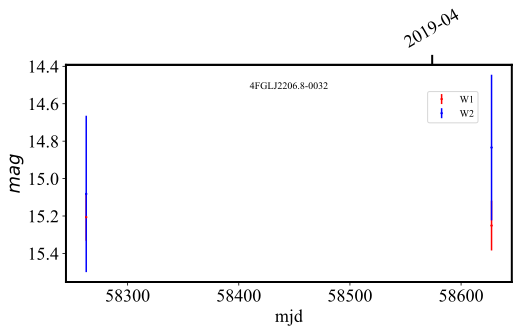

In [241]:
save_lc_img_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc/Fermi_bll'
if not os.path.exists(save_lc_img_dir):
    os.mkdir(save_lc_img_dir)
for index,name in enumerate(Fermi_4LAC_DR3_h_bll_pd_neogt20['Source_Name']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    
    #name_neo= os.path.join(Fermi_bll_wisedata_dir,'wise_%s_neo.csv'%save_name)
    #name_mep= os.path.join(Fermi_bll_wisedata_dir,'wise_%s_mep.csv'%save_name)
    
    #if os.path.exists(name_neo) and os.path.exists(name_mep):     
    wise_plot_lc(save_name,save_lc_img_dir=save_lc_img_dir,datawise_dir=Fermi_bll_wisedata_dir)

In [206]:
Fermi_bll_wisedata_dir

'/Volumes/ExtremeSSD/data_source/WISE_data/WISE_fermi_blazars/BLL'

In [207]:
!open /Volumes/ExtremeSSD/data_source/WISE_data/WISE_fermi_blazars/BLL

In [249]:
save_lc_img_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_lc/Fermi_fsrq'
if not os.path.exists(save_lc_img_dir):
    os.mkdir(save_lc_img_dir)
for index,name in enumerate(Fermi_4LAC_DR3_h_fsrq_pd_neogt20['Source_Name']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    wise_plot_lc(save_name,save_lc_img_dir=save_lc_img_dir,datawise_dir=Fermi_fsrq_wisedata_dir)

# CLB_list_CLB

In [309]:
CLB_list=pd.read_csv('/Users/lyubing/Downloads/kangshiju_paper/A02_Table_catalog_plot.csv')

In [310]:
CLB_list_CLB=CLB_list[CLB_list['V5']=='CLB']
CLB_list_CLB=drop_index(CLB_list_CLB)

In [311]:
CLB_list_CLB['V1']

0      4FGL J0006.3-0620
1      4FGL J0014.2+0854
2      4FGL J0022.0+0006
3      4FGL J0058.4+3315
4      4FGL J0058.4+3315
             ...        
132    4FGL J2315.6-5018
133    4FGL J2315.6-5018
134    4FGL J2345.2-1555
135    4FGL J2349.4+0534
136    4FGL J2357.4-0152
Name: V1, Length: 137, dtype: object

for index,name in enumerate(CLB_list_CLB_neogt20['V1'][:1]):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')    
    #if os.path.exists('./wise_%s_mep.csv'%save_name): 
    neo_path='%s/wise_%s_neo.csv'%(CLB_wisedata_dir,save_name)
    if os.path.exists(neo_path):# and os.path.exists('./wise_%s_mep.csv'%save_name):
        print(save_name)

## CLB_list_CLB_neogt20

CLB_list_CLB

In [312]:
for index,name in enumerate(CLB_list_CLB['V1']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    #if os.path.exists('./wise_%s_mep.csv'%save_name):
    neo_path='%s/wise_%s_neo.csv'%(CLB_wisedata_dir,save_name)
    if not os.path.exists(neo_path):# and os.path.exists('./wise_%s_mep.csv'%save_name):
    #if not os.path.exists('./CLB_list_CLB/wise_%s_neo.csv'%save_name):
        CLB_list_CLB.loc[index,'len_neo']=0
        continue
    data=pd.read_csv(neo_path)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    
    #data=data[data['w1mpro']<15]
    #data=data[data['w2mpro']<13]
    #data=data[data['w1rchi2']<5]
    #data=data[data['w2rchi2']<5]
    #data=data[data['nb']<3]
    #data=data[data['na']==0]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>5:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        CLB_list_CLB.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLB_list_CLB.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        CLB_list_CLB.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        
        
        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLB_list_CLB.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        CLB_list_CLB.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        CLB_list_CLB.loc[index,'len_neo']=len(data)
        CLB_list_CLB.loc[index,'W1-W2']=np.average(data['w1mpro']-data['w2mpro'])
    
    else:
        CLB_list_CLB.loc[index,'len_neo']=0

In [313]:
CLB_list_CLB_neogt20=CLB_list_CLB[CLB_list_CLB['len_neo']>20]
CLB_list_CLB_neogt20=drop_index(CLB_list_CLB_neogt20)

In [314]:
CLB_list_CLB_neogt20.to_csv('CLB_neogt20.csv',index=False)

for i in CLB_list_CLB_neogt20.columns:
    print(i)

In [315]:
for index,z in enumerate(CLB_list_CLB_neogt20['Redshift.y']):
    d_cm=cosmo.luminosity_distance(z=z).to(u.cm).value
    
    CLB_list_CLB_neogt20.loc[index,'LW1']=W1mag_to_Lum(CLB_list_CLB_neogt20.loc[index,'mean_m_w1_neo'],d_cm)
    CLB_list_CLB_neogt20.loc[index,'LW2']=W1mag_to_Lum(CLB_list_CLB_neogt20.loc[index,'mean_m_w2_neo'],d_cm)
    

CLB_list_CLB_neogt20[CLB_list_CLB_neogt20['sigma_m_w1_neo']==0]['len_neo']

In [279]:
len(CLB_list_CLB_neogt20)

46

# CLB_list_CLB_candidates

In [316]:
CLB_list_CLB_candidates=CLB_list[CLB_list['V5']=='Predictions']
CLB_list_CLB_candidates=drop_index(CLB_list_CLB_candidates)

In [317]:
for index,name in enumerate(CLB_list_CLB_candidates['V1']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    #if os.path.exists('./wise_%s_mep.csv'%save_name):
    neo_path='%s/wise_%s_neo.csv'%(CLBcand_wisedata_dir,save_name)
    if not os.path.exists(neo_path):# and os.path.exists('./wise_%s_mep.csv'%save_name):
    #if not os.path.exists('./CLB_list_CLB/wise_%s_neo.csv'%save_name):
        CLB_list_CLB.loc[index,'len_neo']=0
        continue
    data=pd.read_csv(neo_path)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    
    #data=data[data['w1mpro']<15]
    #data=data[data['w2mpro']<13]
    #data=data[data['w1rchi2']<5]
    #data=data[data['w2rchi2']<5]
    #data=data[data['nb']<3]
    #data=data[data['na']==0]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>5:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        CLB_list_CLB.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLB_list_CLB_candidates.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        CLB_list_CLB_candidates.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        
        
        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLB_list_CLB_candidates.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        CLB_list_CLB_candidates.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        CLB_list_CLB_candidates.loc[index,'len_neo']=len(data)
        CLB_list_CLB_candidates.loc[index,'W1-W2']=np.average(data['w1mpro']-data['w2mpro'])
    
    else:
        CLB_list_CLB_candidates.loc[index,'len_neo']=0

## CLB_list_CLB_candidates_neogt20

In [318]:
CLB_list_CLB_candidates_neogt20=CLB_list_CLB_candidates[CLB_list_CLB_candidates['len_neo']>20]
CLB_list_CLB_candidates_neogt20=drop_index(CLB_list_CLB_candidates_neogt20)

In [321]:
for index,z in enumerate(CLB_list_CLB_candidates_neogt20['Redshift.y']):
    d_cm=cosmo.luminosity_distance(z=z).to(u.cm).value
    
    CLB_list_CLB_candidates_neogt20.loc[index,'LW1']=W1mag_to_Lum(CLB_list_CLB_candidates_neogt20.loc[index,'mean_m_w1_neo'],d_cm)
    CLB_list_CLB_candidates_neogt20.loc[index,'LW2']=W1mag_to_Lum(CLB_list_CLB_candidates_neogt20.loc[index,'mean_m_w2_neo'],d_cm)
    

# Fermi_4LAC_DR3_h

In [ ]:
'Source_Name'

In [35]:
Fermi_4LAC_DR3_h = fits.open('/Users/lyubing/Downloads/kangshiju_paper/table-4LAC-DR3-h.fits')
Fermi_4LAC_DR3_h_data = Fermi_4LAC_DR3_h[1].data

In [200]:
len(Fermi_4LAC_DR3_h_bll),len(Fermi_4LAC_DR3_h_fsrq)

(1379, 755)

In [36]:
Fermi_4LAC_DR3_h_bll = Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS'].lower()=='bll']

In [37]:
Fermi_4LAC_DR3_h_fsrq=Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS'].lower()=='fsrq']

In [62]:
Fermi_4LAC_DR3_h_bll_pd=Table(Fermi_4LAC_DR3_h_bll).to_pandas()

In [61]:
Fermi_4LAC_DR3_h_fsrq_pd=Table(Fermi_4LAC_DR3_h_fsrq).to_pandas()

In [63]:
Fermi_4LAC_DR3_h_bll_pd.columns

Index(['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Signif_Avg', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100',
       'Unc_Energy_Flux100', 'SpectrumType', 'PL_Index', 'Unc_PL_Index',
       'Pivot_Energy', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta',
       'Flags', 'CLASS', 'ASSOC1', 'ASSOC_PROB_BAY', 'ASSOC_PROB_LR',
       'Counterpart_Catalog', 'RA_Counterpart', 'DEC_Counterpart',
       'Unc_Counterpart', 'VLBI_Counterpart', 'Redshift', 'SED_class',
       'HE_EPeak', 'Unc_HE_EPeak', 'HE_nuFnuPeak', 'Unc_HE_nuFnuPeak',
       'nu_syn', 'nuFnu_syn', 'Variability_Index', 'Frac_Variability',
       'Unc_Frac_Variability', 'Highest_energy'],
      dtype='object')

## Fermi_4LAC_DR3_h_bll_pd

In [280]:
for index,name in enumerate(Fermi_4LAC_DR3_h_bll_pd['Source_Name']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    #if os.path.exists('./wise_%s_mep.csv'%save_name):
    neo_path='%s/wise_%s_neo.csv'%(Fermi_bll_wisedata_dir,save_name)
    if not os.path.exists(neo_path):# and os.path.exists('./wise_%s_mep.csv'%save_name):
    #if not os.path.exists('./Fermi_4LAC_DR3_h_bll_pd/wise_%s_neo.csv'%save_name):
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'len_neo']=0
        continue
    data=pd.read_csv(neo_path)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    
    #data=data[data['w1mpro']<15]
    #data=data[data['w2mpro']<13]
    #data=data[data['w1rchi2']<5]
    #data=data[data['w2rchi2']<5]
    #data=data[data['nb']<3]
    #data=data[data['na']==0]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>5:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        
        
        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'len_neo']=len(data)
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'W1-W2']=np.average(data['w1mpro']-data['w2mpro'])
    
    else:
        Fermi_4LAC_DR3_h_bll_pd.loc[index,'len_neo']=0


In [281]:
Fermi_4LAC_DR3_h_bll_pd_neogt20=Fermi_4LAC_DR3_h_bll_pd[Fermi_4LAC_DR3_h_bll_pd['len_neo']>20]
Fermi_4LAC_DR3_h_bll_pd_neogt20=drop_index(Fermi_4LAC_DR3_h_bll_pd_neogt20)

In [282]:
Fermi_4LAC_DR3_h_bll_pd_neogt20.to_csv('Fermi_4LAC_DR3_h_bll_pd_neogt20.csv',index=False)

In [283]:
Fermi_4LAC_DR3_h_bll_pd_neogt20.columns

Index(['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Signif_Avg', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100',
       'Unc_Energy_Flux100', 'SpectrumType', 'PL_Index', 'Unc_PL_Index',
       'Pivot_Energy', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta',
       'Flags', 'CLASS', 'ASSOC1', 'ASSOC_PROB_BAY', 'ASSOC_PROB_LR',
       'Counterpart_Catalog', 'RA_Counterpart', 'DEC_Counterpart',
       'Unc_Counterpart', 'VLBI_Counterpart', 'Redshift', 'SED_class',
       'HE_EPeak', 'Unc_HE_EPeak', 'HE_nuFnuPeak', 'Unc_HE_nuFnuPeak',
       'nu_syn', 'nuFnu_syn', 'Variability_Index', 'Frac_Variability',
       'Unc_Frac_Variability', 'Highest_energy', 'pearson_coeff_neo',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo',
       'len_neo', 'W1-W2'],
      dtype='object')

for i in Fermi_4LAC_DR3_h_bll_pd_neogt20[Fermi_4LAC_DR3_h_bll_pd_neogt20['sigma_m_w1_neo']==0]['len_neo']:
    print(i)

for i in Fermi_4LAC_DR3_h_fsrq_pd_neogt20[Fermi_4LAC_DR3_h_fsrq_pd_neogt20['sigma_m_w1_neo']==0]['len_neo']:
    print(i)

In [284]:
#D_cm_bll= cosmo.luminosity_distance(z=Fermi_4LAC_DR3_h_bll_pd_neogt20['Redshift']).to(u.cm) 
for index,z in enumerate(Fermi_4LAC_DR3_h_bll_pd_neogt20['Redshift']):
    if z>0:
        d_cm=cosmo.luminosity_distance(z=z).to(u.cm).value    
        Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'LW1']=W1mag_to_Lum(Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'mean_m_w1_neo'],d_cm)
        Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'LW2']=W1mag_to_Lum(Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'mean_m_w2_neo'],d_cm)
    else:
        Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'LW1']=-1
        Fermi_4LAC_DR3_h_bll_pd_neogt20.loc[index,'LW2']=-1
           

### Withredshift

In [285]:
Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift=Fermi_4LAC_DR3_h_bll_pd_neogt20[Fermi_4LAC_DR3_h_bll_pd_neogt20['LW1']>0]
Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift=drop_index(Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift)                                                                                                                           
    

(array([6., 2., 3., 0., 0., 2., 0., 0., 0., 1.]),
 array([0.227 , 0.3071, 0.3872, 0.4673, 0.5474, 0.6275, 0.7076, 0.7877,
        0.8678, 0.9479, 1.028 ], dtype=float32),
 <BarContainer object of 10 artists>)

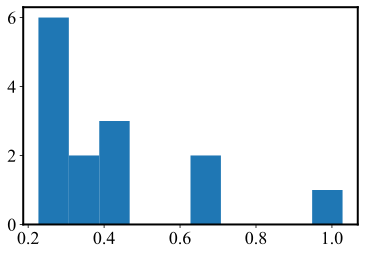

In [356]:
plt.hist(Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift['Redshift'])

## Fermi_4LAC_DR3_h_fsrq_pd

In [286]:
for index,name in enumerate(Fermi_4LAC_DR3_h_fsrq_pd['Source_Name']):
    search_name=name.strip()
    save_name=name.strip().replace(' ','')
    #if os.path.exists('./wise_%s_mep.csv'%save_name):
    neo_path='%s/wise_%s_neo.csv'%(Fermi_fsrq_wisedata_dir,save_name)
    if not os.path.exists(neo_path):# and os.path.exists('./wise_%s_mep.csv'%save_name):
    #if not os.path.exists('./Fermi_4LAC_DR3_h_fsrq_pd/wise_%s_neo.csv'%save_name):
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'len_neo']=0
        continue
    data=pd.read_csv(neo_path)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    
    #data=data[data['w1mpro']<15]
    #data=data[data['w2mpro']<13]
    #data=data[data['w1rchi2']<5]
    #data=data[data['w2rchi2']<5]
    #data=data[data['nb']<3]
    #data=data[data['na']==0]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>5:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        
        
        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'len_neo']=len(data)
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'W1-W2']=np.average(data['w1mpro']-data['w2mpro'])
    
    else:
        Fermi_4LAC_DR3_h_fsrq_pd.loc[index,'len_neo']=0


In [289]:
Fermi_4LAC_DR3_h_fsrq_pd_neogt20=Fermi_4LAC_DR3_h_fsrq_pd[Fermi_4LAC_DR3_h_fsrq_pd['len_neo']>20]
Fermi_4LAC_DR3_h_fsrq_pd_neogt20=drop_index(Fermi_4LAC_DR3_h_fsrq_pd_neogt20)


In [ ]:
#Fermi_4LAC_DR3_h_fsrq_pd_neogt20.to_csv('Fermi_4LAC_DR3_h_fsrq_pd_neogt20.csv',index=False)

In [290]:
for index,z in enumerate(Fermi_4LAC_DR3_h_fsrq_pd_neogt20['Redshift']):
    d_cm=cosmo.luminosity_distance(z=z).to(u.cm).value
    
    Fermi_4LAC_DR3_h_fsrq_pd_neogt20.loc[index,'LW1']=W1mag_to_Lum(Fermi_4LAC_DR3_h_fsrq_pd_neogt20.loc[index,'mean_m_w1_neo'],d_cm)
    Fermi_4LAC_DR3_h_fsrq_pd_neogt20.loc[index,'LW2']=W1mag_to_Lum(Fermi_4LAC_DR3_h_fsrq_pd_neogt20.loc[index,'mean_m_w2_neo'],d_cm)
    
   

!open .

In [ ]:
CLB_list_CLB_neogt20,Fermi_4LAC_DR3_h_bll_pd_neogt20,Fermi_4LAC_DR3_h_fsrq_pd_neogt20

Fermi_4LAC_DR3_h_bll_pd_neogt20

In [73]:
Fermi_4LAC_DR3_h_bll_pd_neogt20.columns


Index(['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Signif_Avg', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100',
       'Unc_Energy_Flux100', 'SpectrumType', 'PL_Index', 'Unc_PL_Index',
       'Pivot_Energy', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta',
       'Flags', 'CLASS', 'ASSOC1', 'ASSOC_PROB_BAY', 'ASSOC_PROB_LR',
       'Counterpart_Catalog', 'RA_Counterpart', 'DEC_Counterpart',
       'Unc_Counterpart', 'VLBI_Counterpart', 'Redshift', 'SED_class',
       'HE_EPeak', 'Unc_HE_EPeak', 'HE_nuFnuPeak', 'Unc_HE_nuFnuPeak',
       'nu_syn', 'nuFnu_syn', 'Variability_Index', 'Frac_Variability',
       'Unc_Frac_Variability', 'Highest_energy', 'pearson_coeff_neo',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo',
       'len_neo', 'W1-W2'],
      dtype='object')

## sigma_W1 W1-W2

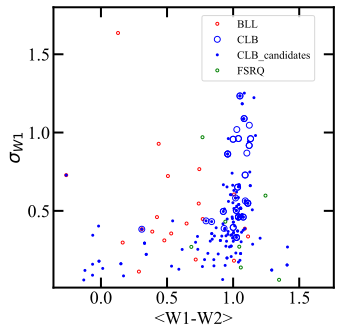

In [344]:
#fig = plt.figure(figsize=(6, 6))
#ax_histx=fig.add_subplot(1,1,1)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

#x = np.random.randn(1000)
#y = np.random.randn(1000)

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.4, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
#ax_histx = fig.add_axes(rect_histx, sharex=ax)
'''ax_histy = fig.add_axes(rect_histy, sharey=ax)
#ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
'''

'''for index,name in enumerate(Extreme_QSO_select['Name']):
    ax.scatter(Extreme_QSO_select.loc[index,'logL_W1']-Extreme_QSO_select.loc[index,'logBH']-np.log10(1.263e38),
               Extreme_QSO_select.loc[index,'W1-W2'],
               s=size,color='cyan',marker='*',alpha=0.5,label='EVQ',zorder=1)
'''
        
select_plot=Fermi_4LAC_DR3_h_bll_pd_neogt20
xplot_label='W1-W2'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='BLL',
           ms=3., mew=1, capsize=0,mec='r',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)


select_plot=Fermi_4LAC_DR3_h_fsrq_pd_neogt20
xplot_label='W1-W2'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='FSRQ',
           ms=3., mew=1, capsize=0,mec='g',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)



select_plot=CLB_list_CLB_neogt20
xplot_label='W1-W2'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB',
           ms=6., mew=1, capsize=0,mec='blue',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)



select_plot=CLB_list_CLB_candidates_neogt20
xplot_label='W1-W2'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB_candidates',
           ms=3., mew=0, capsize=0,mec='blue',ecolor='blue',
           mfc='blue',
           elinewidth=2,ls='',fillstyle='full',zorder=0)




set_ax_legend(ax,bbox_to_anchor=(0.51,0.99))
ax.set_xlabel('<W1-W2>')
ax.set_ylabel(r'$\sigma_{W1}$')
ax.set_ylim(0.01,1.8)
set_ax_tick(ax)

fig.savefig('%s/WISE_plot/CLB_WISE_sigmaW1_W1-W2.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

## LW1 sigma W1

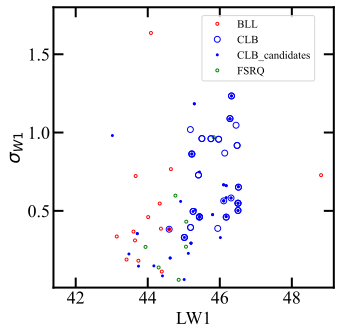

In [333]:
#fig = plt.figure(figsize=(6, 6))
#ax_histx=fig.add_subplot(1,1,1)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

#x = np.random.randn(1000)
#y = np.random.randn(1000)

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.4, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
#ax_histx = fig.add_axes(rect_histx, sharex=ax)
'''ax_histy = fig.add_axes(rect_histy, sharey=ax)
#ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
'''

'''for index,name in enumerate(Extreme_QSO_select['Name']):
    ax.scatter(Extreme_QSO_select.loc[index,'logL_W1']-Extreme_QSO_select.loc[index,'logBH']-np.log10(1.263e38),
               Extreme_QSO_select.loc[index,'W1-W2'],
               s=size,color='cyan',marker='*',alpha=0.5,label='EVQ',zorder=1)
'''
        
select_plot=Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift
xplot_label='LW1'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='BLL',
           ms=3., mew=1, capsize=0,mec='r',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)


select_plot=Fermi_4LAC_DR3_h_fsrq_pd_neogt20
xplot_label='LW1'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='FSRQ',
           ms=3., mew=1, capsize=0,mec='g',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)



select_plot=CLB_list_CLB_neogt20
xplot_label='LW1'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB',
           ms=6., mew=1, capsize=0,mec='blue',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)


select_plot=CLB_list_CLB_candidates_neogt20
xplot_label='LW1'
yplot_label='sigma_m_w1_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB_candidates',
           ms=3., mew=0, capsize=0,mec='blue',ecolor='blue',
           mfc='blue',
           elinewidth=2,ls='',fillstyle='full',zorder=0)


ax.set_xlabel('LW1')
ax.set_ylabel(r'$\sigma_{W1}$')
ax.set_ylim(0.01,1.8)

set_ax_tick(ax)
set_ax_legend(ax,bbox_to_anchor=(0.51,0.99))

fig.savefig('%s/WISE_plot/CLB_WISE_sigmaW1-LW1.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

## LW2 sigma w2

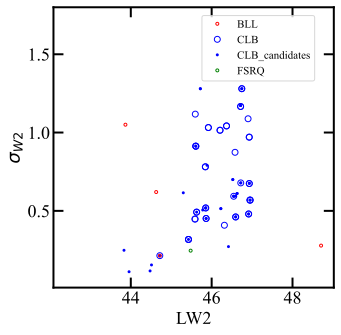

In [354]:
#fig = plt.figure(figsize=(6, 6))
#ax_histx=fig.add_subplot(1,1,1)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

#x = np.random.randn(1000)
#y = np.random.randn(1000)

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.4, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
#ax_histx = fig.add_axes(rect_histx, sharex=ax)
'''ax_histy = fig.add_axes(rect_histy, sharey=ax)
#ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
'''

'''for index,name in enumerate(Extreme_QSO_select['Name']):
    ax.scatter(Extreme_QSO_select.loc[index,'logL_W1']-Extreme_QSO_select.loc[index,'logBH']-np.log10(1.263e38),
               Extreme_QSO_select.loc[index,'W1-W2'],
               s=size,color='cyan',marker='*',alpha=0.5,label='EVQ',zorder=1)
'''
        
select_plot=Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift
xplot_label='LW2'
yplot_label='sigma_m_w2_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='BLL',
           ms=3., mew=1, capsize=0,mec='r',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)


select_plot=Fermi_4LAC_DR3_h_fsrq_pd_neogt20
xplot_label='LW2'
yplot_label='sigma_m_w2_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='FSRQ',
           ms=3., mew=1, capsize=0,mec='g',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)



select_plot=CLB_list_CLB_neogt20
xplot_label='LW2'
yplot_label='sigma_m_w2_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB',
           ms=6., mew=1, capsize=0,mec='blue',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)


select_plot=CLB_list_CLB_candidates_neogt20
xplot_label='LW2'
yplot_label='sigma_m_w2_neo'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB_candidates',
           ms=3., mew=0, capsize=0,mec='blue',ecolor='blue',
           mfc='blue',
           elinewidth=2,ls='',fillstyle='full',zorder=0)


ax.set_xlabel('LW2')
ax.set_ylabel(r'$\sigma_{W2}$')
ax.set_ylim(0.01,1.8)

set_ax_tick(ax)
set_ax_legend(ax,bbox_to_anchor=(0.51,0.99))

fig.savefig('%s/WISE_plot/CLB_WISE_sigmaW2-LW2.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')
plt.show()
plt.close()


## Lw1 vs W1-W2

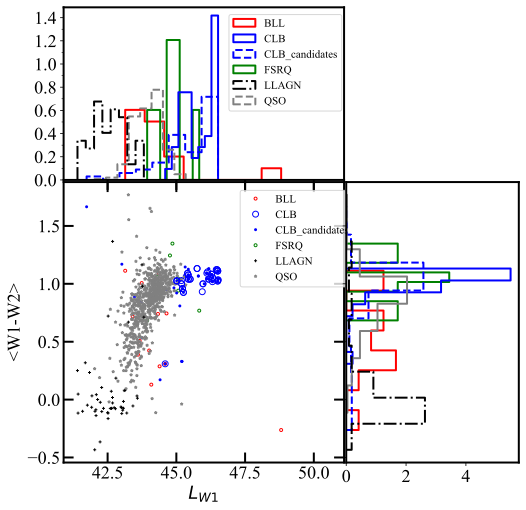

In [352]:
#fig = plt.figure(figsize=(6, 6))
#ax_histx=fig.add_subplot(1,1,1)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

#x = np.random.randn(1000)
#y = np.random.randn(1000)

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.4]
rect_histy = [left + width + spacing, bottom, 0.4, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)

ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)



        
#select_plot=Fermi_4LAC_DR3_h_bll_pd_neogt20 
select_plot=Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift

xplot_label='LW1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='BLL',
           ms=3., mew=1, capsize=0,mec='r',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)
ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='BLL',edgecolor='red',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='BLL',edgecolor='red',
              orientation='horizontal'
             )



select_plot=Fermi_4LAC_DR3_h_fsrq_pd_neogt20
xplot_label='LW1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='FSRQ',
           ms=3., mew=1, capsize=0,mec='g',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)
ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='FSRQ',edgecolor='g',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='FSRQ',edgecolor='g',
              orientation='horizontal'
             )


select_plot=CLB_list_CLB_neogt20
xplot_label='LW1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB',
           ms=6., mew=1, capsize=0,mec='blue',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=1)

ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         #linestyle ='--',
              linewidth=2,
        label='CLB',edgecolor='blue',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
              label='CLB',edgecolor='blue',
              orientation='horizontal'
             )

select_plot=CLB_list_CLB_candidates_neogt20
xplot_label='LW1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='o',label='CLB_candidates',
           ms=3., mew=0, capsize=0,mec='blue',ecolor='blue',
           mfc='blue',
           elinewidth=2,ls='',fillstyle='full',zorder=0)

ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
              linestyle ='--',
              linewidth=2,
        label='CLB_candidates',edgecolor='blue',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
              linestyle ='--',
              linewidth=2,
              label='CLB_candidates',edgecolor='blue',
              orientation='horizontal'
             )





select_plot=QSO_select
xplot_label='logL_W1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='*',label='QSO',
           ms=3., mew=1, capsize=0,mec='grey',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)

ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         linestyle ='--',
              linewidth=2,
        label='QSO',edgecolor='grey',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
              #linestyle ='--',
              linewidth=2,
              label='QSO',edgecolor='grey',
              orientation='horizontal'
             )



select_plot=LLAGN_gu2009
xplot_label='logL_W1'
yplot_label='W1-W2'
ax.errorbar(x= select_plot[xplot_label],
           y=select_plot[yplot_label],
           marker='+',label='LLAGN',
           ms=3., mew=1, capsize=0,mec='black',ecolor='r',
           elinewidth=2,ls='',fillstyle='none',zorder=0)

ax_histx.hist(select_plot[xplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
         linestyle ='-.',
              linewidth=2,
        label='LLAGN',edgecolor='black',
              #orientation='horizontal'
             )
ax_histy.hist(select_plot[yplot_label], bins=8,fill=False,density=True,stacked =True,
              histtype='step',
              linestyle ='-.',
              linewidth=2,
              label='LLAGN',edgecolor='black',
              orientation='horizontal'
             )





ax.set_xlabel(r'$L_{W1}$')
ax.set_ylabel(r'<W1-W2>')
#ax.set_ylim(0.01,1.3)
set_ax_tick(ax)
#set_ax_legend(ax,bbox_to_anchor=(0.69,0.5))
set_ax_legend(ax_histx,bbox_to_anchor=(0.57,0.99))
set_ax_legend(ax,bbox_to_anchor=(0.61,0.99))
ax_histx.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax_histx.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
#ax_histx.set_ylim(0.01,0.9)
#set_ax_tick(ax_histx,)

ax.set_xlim(41-0.1,51.1)

fig.savefig('%s/WISE_plot/CLB_WISE_W1-W2_LW1.png'%CLAGN_statistic_plot_dir,
            dpi=400, transparent=False, bbox_inches='tight')
plt.show()
plt.close()

In [175]:
CLAGN_statistic_plot_dir

'/Volumes/ExtremeSSD/CLAGN_statistic_plot/'

In [353]:
!open /Volumes/ExtremeSSD/CLAGN_statistic_plot/WISE_plot

QSO_select['LW1']

Fermi_4LAC_DR3_h_bll_pd_neogt20['LW1']#['Redshift']

In [137]:
len(Fermi_4LAC_DR3_h_bll_pd_neogt20)

282

In [138]:
len(Fermi_4LAC_DR3_h_bll_pd_neogt20_redshift)

169

In [248]:
len(Fermi_4LAC_DR3_h_fsrq_pd_neogt20)

136

# QSO

In [155]:
#CLAGN_statistic_plot_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
#QSO=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/QSO_wise_var.csv')
QSO=pd.read_csv('%s/QSO_wise_var.csv'%CLAGN_statistic_plot_dir)

QSO['log(L5100)']=(QSO['lg(LHalpha)']-np.log10(5.25)-42)/1.157+44
QSO['log(Lbol)']=np.log10(9)+QSO['log(L5100)']
QSO['log(Ledd)']=np.log10(1.263*10**38)+QSO['lg(L_Mbh)']
QSO['log(Lbol/Ledd)']=QSO['log(Lbol)']-QSO['log(Ledd)']
#print(QSO.columns)
#D_cm_QSO=cosmo.luminosity_distance(z=QSO['redshift']).to(u.cm)
#QSO['D_cm']=cosmo.luminosity_distance(z=QSO['redshift']).to(u.cm)

In [156]:
for index,z in enumerate(QSO['redshift']):
    d_cm=cosmo.luminosity_distance(z=z).to(u.cm).value
    QSO.loc[index,'D_cm']=d_cm

In [157]:
QSO['logL_W1']= (-48.6-QSO['mean_m_w1_neo']-2.699)/2.5+np.log10(4*np.pi*QSO['D_cm']**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
QSO['logL_W2']= (-48.6-QSO['mean_m_w2_neo']-3.339)/2.5+np.log10(4*np.pi*QSO['D_cm']**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)


QSO['LW1']=10**QSO['logL_W1']
QSO['LW2']=10**QSO['logL_W2']

In [163]:
QSO_select=QSO[QSO['len_neo']>20]
#QSO_select=QSO_select[QSO_select['pearson_coeff_neo']>0.8]
QSO_select=drop_index(QSO_select)

In [159]:
len(QSO_select)

732

# LLAGN

In [170]:
LLAGN_gu2009=pd.read_csv('%s/LLAGN_gu2009.csv'%CLAGN_statistic_plot_dir)

LLAGN_gu2009=LLAGN_gu2009[LLAGN_gu2009['len_neo']>20]
LLAGN_gu2009=drop_index(LLAGN_gu2009)